In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
import pandas as pd
from scipy.spatial.distance import jaccard
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr, ranksums, ttest_ind

In [2]:
path = ''

In [3]:
ids = pd.read_excel('IDs_HC.xlsx')

In [4]:
preterm_ids = np.where(ids['PRETERM(1)'] == 1)[0]
term_ids = np.where(ids['PRETERM(1)'] == 0)[0]

In [5]:
neonatal_mats = sio.loadmat(path+'ST_bin_neonates.mat')['ST_bin']
prem_mats = neonatal_mats[:,:,preterm_ids]
term_mats = neonatal_mats[:,:,term_ids]

In [6]:
hcp_mats = sio.loadmat(path+'ST_HCP94_bin.mat')['ST_bin']

In [7]:
parcels = pd.read_csv(path+'labels_84.txt',header=None, sep="\s+", names=['index','short','name','r','g','b','alpha'])
parcels.set_index('index',inplace=True)

ROIs assignment to tiers with 2/3 rule

In [8]:
rois_prem = np.zeros([84,])
[r,c] = np.where(tier_prem>=77/3*2)
rois_prem[r] = c+1

rois_term = np.zeros([84,])
[r,c] = np.where(tier_term>=59/3*2)
rois_term[r] = c+1

rois_hcp = np.zeros([84,])
[r,c] = np.where(tier_hcp>=45/3*2)
rois_hcp[r] = c+1
tiers_2thirds = np.vstack([rois_prem,rois_term,rois_hcp]).T

NameError: name 'tier_prem' is not defined

 adult thresholds are now:
Tier C: 1-12
Tier B: 13-45
Tier A: 46-max

and for neonates:
Tier C: 1-18
Tier B: 19-40
Tier A: 40-max

In [12]:
node_degrees = np.array([hcp_mats[:,:,i].sum(axis=1) for i in range(hcp_mats.shape[2])])
node_degrees[node_degrees<13] = 3
node_degrees[np.logical_and(node_degrees>12,node_degrees< 46)] = 2
node_degrees[node_degrees>45] = 1
mytiers = np.zeros((84,3))
for i in range(84):
    uniq, cnt = np.unique(node_degrees[:,i], return_counts=True)
    mytiers[i,uniq-1] = cnt 
rois_hcp = np.zeros([84,])
[r,c] = np.where(mytiers>=94/3*2)
rois_hcp[r] = c+1

In [8]:
node_degrees_term = np.array([term_mats[:,:,i].sum(axis=1) for i in range(term_mats.shape[2])])
node_degrees_term[node_degrees_term<19] = 3
node_degrees_term[np.logical_and(node_degrees_term>18,node_degrees_term< 41)] = 2
node_degrees_term[node_degrees_term>40] = 1
mytiers = np.zeros((84,3))
for i in range(84):
    uniq, cnt = np.unique(node_degrees_term[:,i], return_counts=True)
    mytiers[i,uniq-1] = cnt 
rois_term = np.zeros([84,])
[r,c] = np.where(mytiers>=59/3*2)
rois_term[r] = c+1

In [11]:
node_degrees_prem = np.array([prem_mats[:,:,i].sum(axis=1) for i in range(prem_mats.shape[2])])
node_degrees_prem[node_degrees_prem<19] = 3
node_degrees_prem[np.logical_and(node_degrees_prem>18,node_degrees_prem< 41)] = 2
node_degrees_prem[node_degrees_prem>40] = 1
mytiers = np.zeros((84,3))
for i in range(84):
    uniq, cnt = np.unique(node_degrees_prem[:,i], return_counts=True)
    mytiers[i,uniq-1] = cnt 
rois_prem = np.zeros([84,])
[r,c] = np.where(mytiers>=77/3*2)
rois_prem[r] = c+1

The 4 tiers for adults are:
Tier 4: 1-12
Tier 3: 13-28
Tier 2: 29-45
Tier 1: 46-max

In [30]:
node_degrees = np.array([hcp_mats[:,:,i].sum(axis=1) for i in range(hcp_mats.shape[2])])
node_degrees[node_degrees<14] = 4
node_degrees[np.logical_and(node_degrees>13,node_degrees< 31)] = 3
node_degrees[np.logical_and(node_degrees>30,node_degrees< 44)] = 2
node_degrees[node_degrees>43] = 1
mytiers = np.zeros((84,4))
for i in range(84):
    uniq, cnt = np.unique(node_degrees[:,i], return_counts=True)
    mytiers[i,uniq-1] = cnt 
rois_hcp = np.zeros([84,])
[r,c] = np.where(mytiers>=94/3*2)
rois_hcp[r] = c+1

In [30]:
node_degrees = np.array([hcp_mats[:,:,i].sum(axis=1) for i in range(hcp_mats.shape[2])])
node_degrees[node_degrees<14] = 4
node_degrees[np.logical_and(node_degrees>13,node_degrees< 31)] = 3
node_degrees[np.logical_and(node_degrees>30,node_degrees< 44)] = 2
node_degrees[node_degrees>43] = 1
mytiers = np.zeros((84,4))
for i in range(84):
    uniq, cnt = np.unique(node_degrees[:,i], return_counts=True)
    mytiers[i,uniq-1] = cnt 
rois_hcp = np.zeros([84,])
[r,c] = np.where(mytiers>=94/3*2)
rois_hcp[r] = c+1

For neonates, Tier 1 was defined from the maximum degree to a degree of 49, Tier 2 was defined from 48 down to 40, Tier 3 from 39 down to 18 and Tier 4 from 17 down to 1.

term

In [40]:
node_degrees_term = np.array([term_mats[:,:,i].sum(axis=1) for i in range(term_mats.shape[2])])
node_degrees_term[node_degrees_term<18] = 4
node_degrees_term[np.logical_and(node_degrees_term>17,node_degrees_term< 40)] = 3
node_degrees_term[np.logical_and(node_degrees_term>39,node_degrees_term< 49)] = 2
node_degrees_term[node_degrees_term>48] = 1
mytiers = np.zeros((84,4))
for i in range(84):
    uniq, cnt = np.unique(node_degrees_term[:,i], return_counts=True)
    mytiers[i,uniq-1] = cnt 
rois_term = np.zeros([84,])
[r,c] = np.where(mytiers>=59/3*2)
rois_term[r] = c+1

preterm

In [38]:
node_degrees_prem = np.array([prem_mats[:,:,i].sum(axis=1) for i in range(prem_mats.shape[2])])
node_degrees_prem[node_degrees_prem<18] = 4
node_degrees_prem[np.logical_and(node_degrees_prem>17,node_degrees_prem< 40)] = 3
node_degrees_prem[np.logical_and(node_degrees_prem>39,node_degrees_prem< 49)] = 2
node_degrees_prem[node_degrees_prem>43] = 1
mytiers = np.zeros((84,4))
for i in range(84):
    uniq, cnt = np.unique(node_degrees_prem[:,i], return_counts=True)
    mytiers[i,uniq-1] = cnt 
rois_prem = np.zeros([84,])
[r,c] = np.where(mytiers>=77/3*2)
rois_prem[r] = c+1

In [39]:
rois_prem

array([4., 3., 3., 4., 4., 3., 3., 3., 3., 3., 3., 0., 3., 3., 4., 3., 3.,
       4., 0., 4., 3., 3., 3., 3., 3., 3., 2., 3., 3., 3., 4., 4., 4., 3.,
       3., 1., 3., 2., 3., 3., 3., 4., 0., 3., 2., 3., 3., 3., 4., 4., 3.,
       3., 4., 4., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 0., 3., 4., 0.,
       4., 3., 3., 3., 3., 3., 3., 2., 3., 3., 3., 4., 4., 4., 3., 3.])

In [41]:
tiers_2thirds = np.vstack([rois_prem,rois_term,rois_hcp]).T

In [42]:
np.savetxt('tiers_neonates_94hcp_1234.txt',tiers_2thirds,fmt='%d')

In [106]:
tiers_2thirds = np.loadtxt(path+'natural_tiers_2thirds.txt')

In [25]:
tiers_2thirds = np.loadtxt(path+'abc_tiers_2thirds.txt')

In [6]:
preterm = {1:[],2:[],3:[],0:[]}
term = {1:[],2:[],3:[],0:[]}
hcp = {1:[],2:[],3:[],0:[]}
for i in range(len(tiers_2thirds)):
    preterm[tiers_2thirds[i,0]].append(parcels['name'][i+1])
    term[tiers_2thirds[i,1]].append(parcels['name'][i+1])
    hcp[tiers_2thirds[i,2]].append(parcels['name'][i+1])

In [178]:
preterm = {1:[],2:[],3:[],4:[],0:[]}
term = {1:[],2:[],3:[],4:[],0:[]}
hcp = {1:[],2:[],3:[],4:[],0:[]}
for i in range(len(tiers_2thirds)):
    preterm[tiers_2thirds[i,0]].append(parcels['name'][i+1])
    term[tiers_2thirds[i,1]].append(parcels['name'][i+1])
    hcp[tiers_2thirds[i,2]].append(parcels['name'][i+1])

In [57]:
roi_by_tiers = pd.DataFrame([preterm,term,hcp],index=['preterm','term','hcp'])
roi_by_tiers.to_csv(path+'roi_by_tiers_natural.csv')

In [179]:
for tier in [1,2,3,4]:
    print("Tier",tier)
    print('hcp - term', len(np.setdiff1d(hcp[tier],term[tier])))
    print(*np.setdiff1d(hcp[tier],term[tier]),sep=', ')
    print('hcp - preterm', len(np.setdiff1d(hcp[tier],preterm[tier])))
    print(*np.setdiff1d(hcp[tier],preterm[tier]),sep=', ')
    print('term - preterm', len(np.setdiff1d(term[tier],preterm[tier])))
    print(*np.setdiff1d(term[tier],preterm[tier]),sep=', ')
    print('preterm - term', len(np.setdiff1d(preterm[tier],term[tier])))
    print(*np.setdiff1d(preterm[tier],term[tier]),sep=', ')
    print('term - hcp', len(np.setdiff1d(term[tier],hcp[tier])))
    print(*np.setdiff1d(term[tier],hcp[tier]),sep=', ')
    print('preterm - hcp', len(np.setdiff1d(preterm[tier],hcp[tier])))
    print(*np.setdiff1d(preterm[tier],hcp[tier]),sep=', ')

Tier 1
hcp - term 8
Left-Putamen, Right-Putamen, ctx-lh-precuneus, ctx-lh-superiorfrontal, ctx-lh-superiorparietal, ctx-rh-precuneus, ctx-rh-superiorfrontal, ctx-rh-superiorparietal
hcp - preterm 8
Left-Putamen, Right-Putamen, ctx-lh-precuneus, ctx-lh-superiorfrontal, ctx-lh-superiorparietal, ctx-rh-precuneus, ctx-rh-superiorfrontal, ctx-rh-superiorparietal
term - preterm 1
Right-Thalamus
preterm - term 0

term - hcp 1
Right-Thalamus
preterm - hcp 0

Tier 2
hcp - term 11
Left-Caudate, Left-Hippocampus, Right-Caudate, Right-Hippocampus, ctx-lh-insula, ctx-lh-postcentral, ctx-lh-precentral, ctx-lh-rostralmiddlefrontal, ctx-rh-insula, ctx-rh-precentral, ctx-rh-rostralmiddlefrontal
hcp - preterm 11
Left-Caudate, Left-Hippocampus, Right-Caudate, Right-Hippocampus, ctx-lh-insula, ctx-lh-postcentral, ctx-lh-precentral, ctx-lh-rostralmiddlefrontal, ctx-rh-insula, ctx-rh-precentral, ctx-rh-rostralmiddlefrontal
term - preterm 0

preterm - term 0

term - hcp 4
Left-Putamen, Right-Putamen, ctx-lh-

In [10]:
np.savetxt(path+'tiers_2thirds.txt',np.vstack([rois_prem,rois_term,rois_hcp]).T,
          fmt='%d', header='prem term hcp')

In [39]:
np.savetxt(path+'natural_tiers_2thirds.txt',np.vstack([rois_prem,rois_term,rois_hcp]).T,
          fmt='%d', header='prem term hcp')

In [24]:
np.savetxt(path+'abc_tiers_2thirds.txt',np.vstack([rois_prem,rois_term,rois_hcp]).T,
          fmt='%d', header='prem term hcp')

### Symmetry analysis

In [13]:
parcels = pd.read_csv(path+'labels_84.txt', sep="\s+")
parcels.set_index('index',inplace=True)

In [14]:
parcels

short                            long    r    g    b  alpha  \
index                                                                 
0         ???                         Unknown    0    0    0      0   
1      L.BSTS                 ctx-lh-bankssts   25  100   40    255   
2      L.CACG  ctx-lh-caudalanteriorcingulate  125  100  160    255   
3      L.CMFG      ctx-lh-caudalmiddlefrontal  100   25    0    255   
4        L.CU                   ctx-lh-cuneus  220   20  100    255   
...       ...                             ...  ...  ...  ...    ...   
80       R.FP              ctx-rh-frontalpole  100    0  100    255   
81       R.TP             ctx-rh-temporalpole   70   70   70    255   
82      R.TTG       ctx-rh-transversetemporal  150  150  200    255   
83       R.IN                   ctx-rh-insula  255  192   32    255   
84      R.CER        RH_Cerebellar_hemisphere  230  148   34    255   

            class  
index              
0            None  
1          cortex  
2          cortex  
3          cortex  
4          cortex  
...           ...  
80         cortex  
81         cortex  
82         cortex  
83         cortex  
84     cerebellum  

[85 rows x 7 columns]

In [15]:
labels = np.array(parcels['short'][1:])

In [16]:
llabels = [el for el in parcels['short'] if 'L.' in el]
ordered_labels_L = np.hstack([llabels, [el.replace('L.','R.') for el in llabels]])
ordered_labels_R = np.hstack([[el.replace('L.','R.') for el in llabels],llabels])

In [17]:
ordered_rois = np.array([label.replace('L.','') for label in ordered_labels_L[:42]])

In [18]:
label_order_L = [np.where(parcels['short']==el)[0][0]-1 for el in ordered_labels_L] 
label_order_R = [np.where(parcels['short']==el)[0][0]-1 for el in ordered_labels_R] 

In [12]:
adult_matrices = sio.loadmat(path+'Adult_matrices.mat')['Adult_matrices']
prem_matrices = sio.loadmat(path+'preterm_matrices.mat')['preterm_matrices_th']
term_matrices = sio.loadmat(path+'term_matrices.mat')['term_matrices_th']

In [10]:
adult_matrices = hcp_mats
prem_matrices = sio.loadmat(path+'preterm_matrices.mat')['preterm_matrices_th']
term_matrices = sio.loadmat(path+'term_matrices.mat')['term_matrices_th']

In [19]:
len(label_order_L)

84

In [21]:
subject_tiers_ABC = sio.loadmat(path+'ABCTiers.mat')

In [115]:
node_degrees.T

array([[3, 3, 3, ..., 3, 3, 3],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint32)

In [113]:
subject_tiers_ABC['Tiers_adult'].shape

(84, 45)

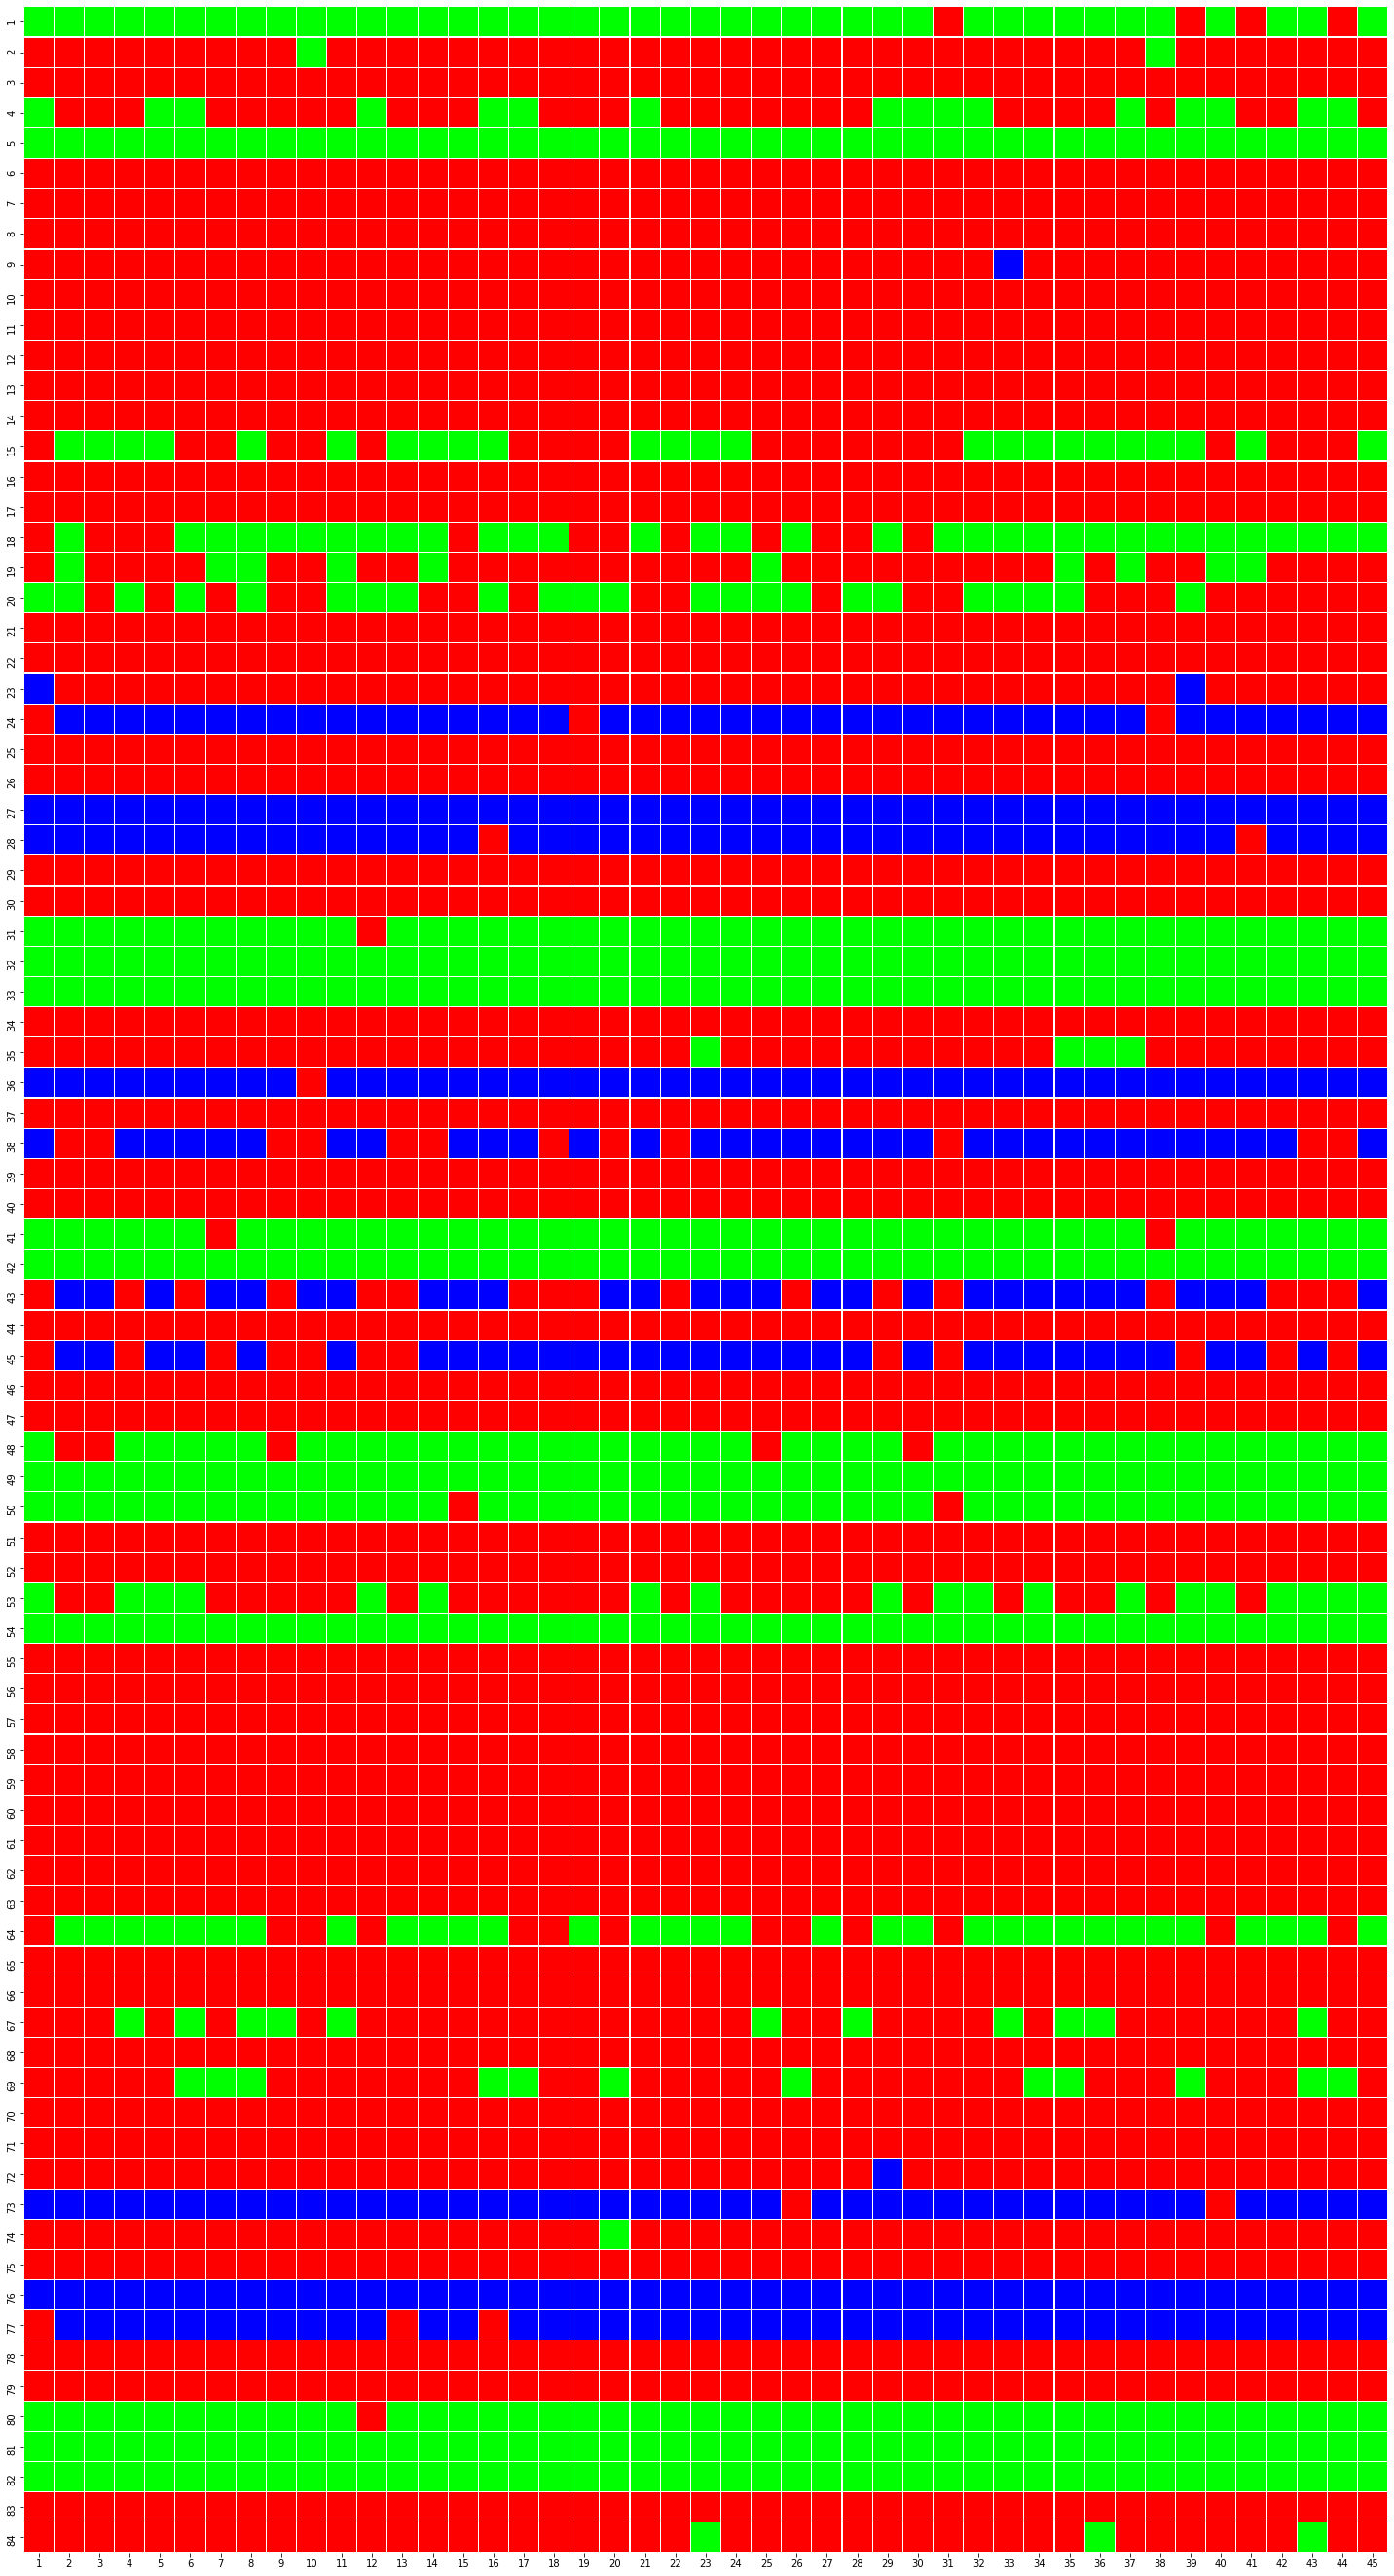

In [5]:
toPlot = subject_tiers_ABC['Tiers_adult']
plt.figure(figsize=(20,40))
ax = sns.heatmap(toPlot, cmap=plt.get_cmap('brg',3), cbar=False, linewidths=.1)
ax.set_aspect('equal')
locs, labels = plt.xticks()
plt.xticks(locs,range(1,toPlot.shape[1]+1))
locs, labels = plt.yticks()
plt.yticks(locs,range(1,toPlot.shape[0]+1))
plt.tight_layout()
plt.show()

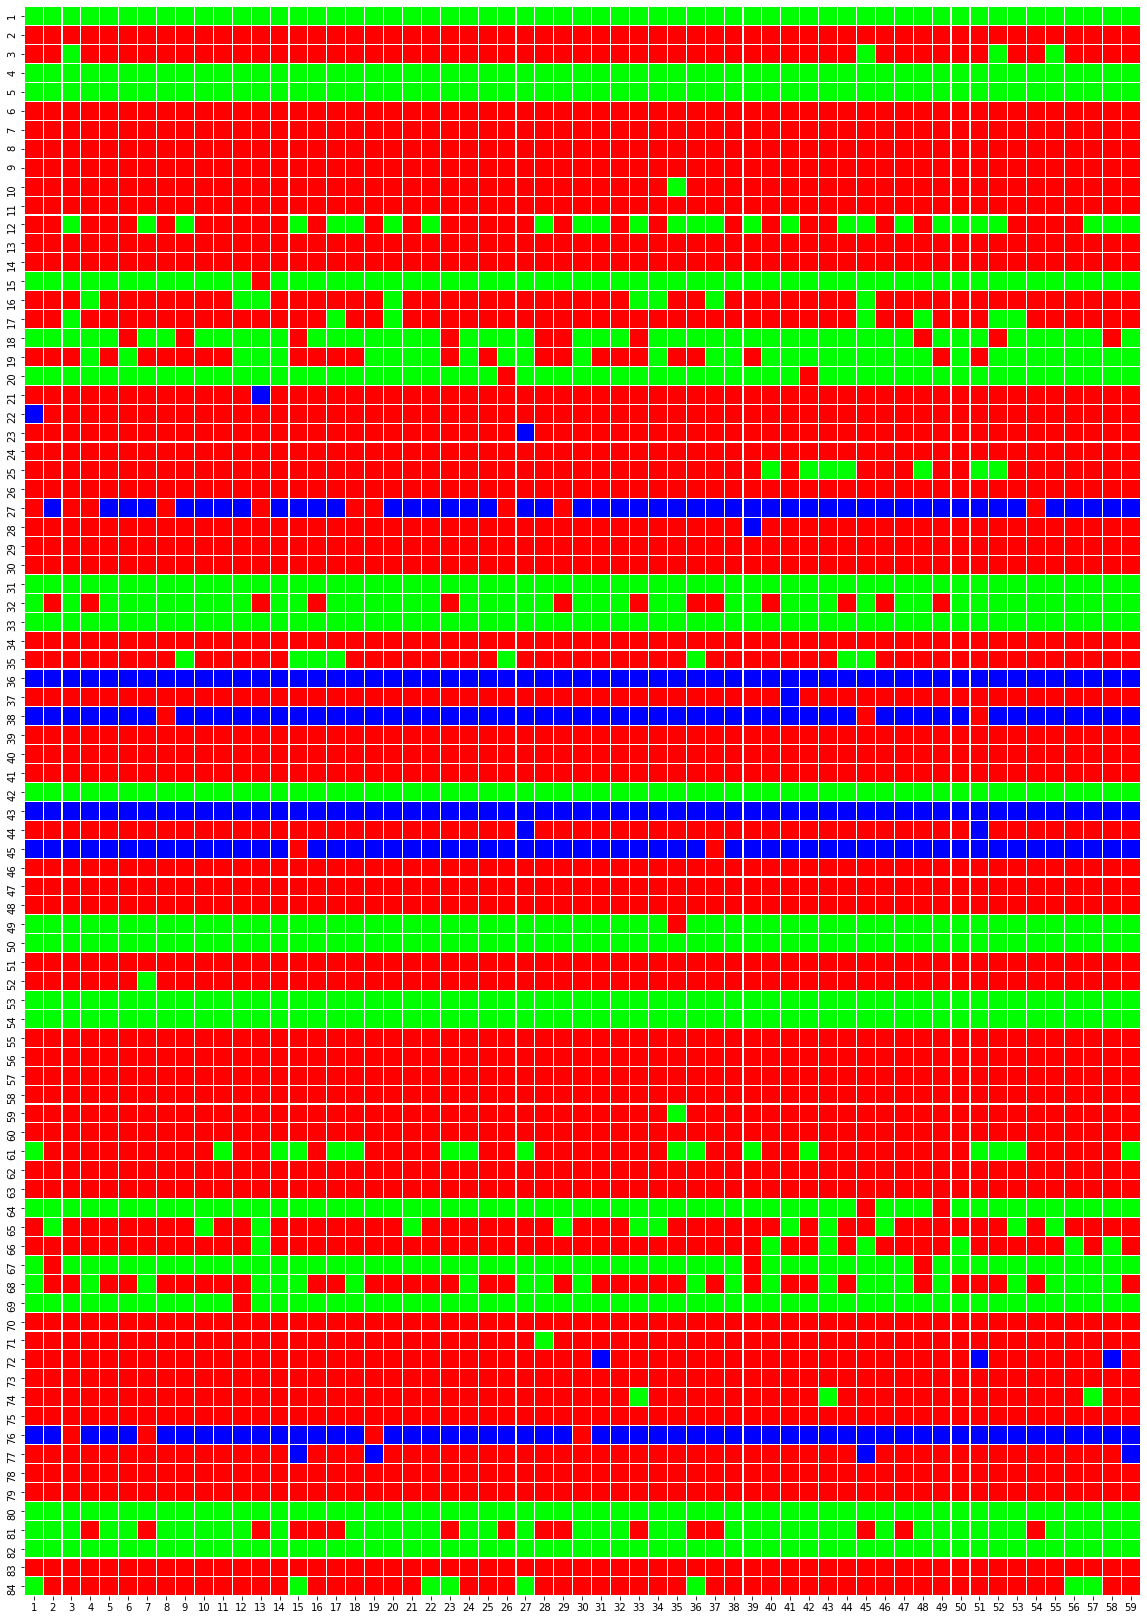

In [62]:
toPlot = subject_tiers_ABC['Tiers_term']
plt.figure(figsize=(20,40))
ax = sns.heatmap(toPlot, cmap=plt.get_cmap('brg',3), cbar=False, linewidths=.1)
ax.set_aspect('equal')
locs, labels = plt.xticks()
plt.xticks(locs,range(1,toPlot.shape[1]+1))
locs, labels = plt.yticks()
plt.yticks(locs,range(1,toPlot.shape[0]+1))
plt.show()

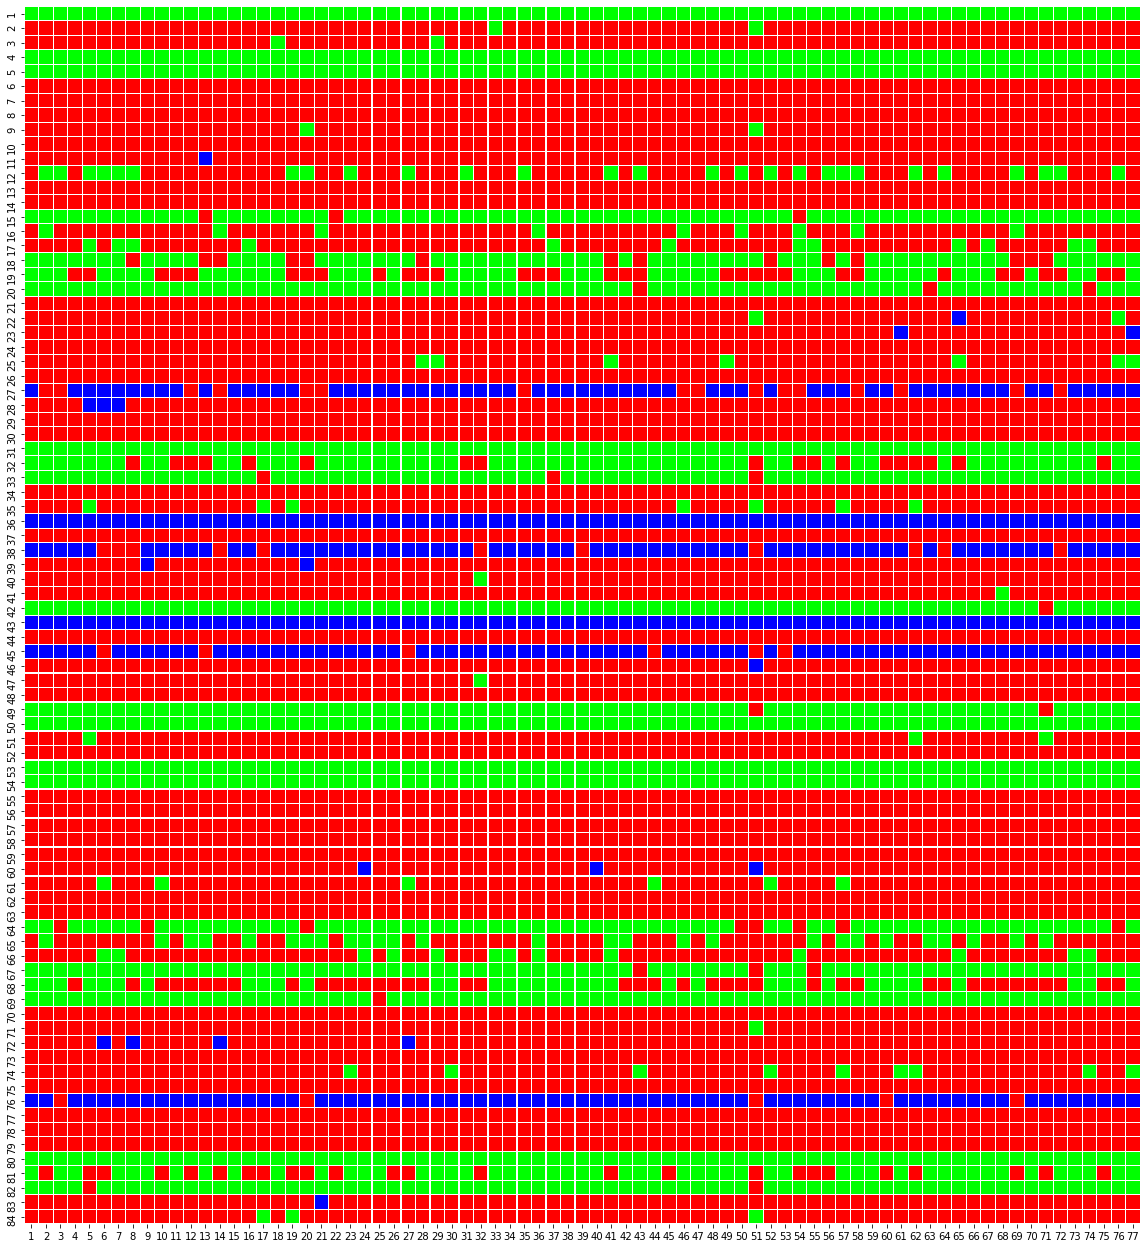

In [63]:
toPlot = subject_tiers_ABC['Tiers_preterm']
plt.figure(figsize=(20,40))
ax = sns.heatmap(toPlot, cmap=plt.get_cmap('brg',3), cbar=False, linewidths=.1)
ax.set_aspect('equal')
locs, labels = plt.xticks()
plt.xticks(locs,range(1,toPlot.shape[1]+1))
locs, labels = plt.yticks()
plt.yticks(locs,range(1,toPlot.shape[0]+1))
plt.show()

Symmetry score based on intersection

In [119]:
n_adults = adult_matrices.shape[-1]
n_prem = prem_matrices.shape[-1]
n_term = term_matrices.shape[-1]
score_adults = np.zeros([84,n_adults])
score_prem = np.zeros([84,n_prem])
score_term = np.zeros([84,n_term])
tier_score_adults = np.zeros([3,n_adults])
tier_score_prem = np.zeros([3,n_prem])
tier_score_term = np.zeros([3,n_term])
n = 83

for iSub in range(n_adults):
    subMat = adult_matrices[:,:,iSub]
    for iParc in range(84):
        a = sum(subMat[label_order_L[iParc],label_order_L])
        b = sum(subMat[label_order_R[iParc],label_order_R])        
        if b == 0 or a == 0:
            score_adults[iParc,iSub] = np.nan
        else:
            normalization = b/n
            score_adults[iParc,iSub] = sum(np.logical_and(subMat[label_order_L[iParc],label_order_L],
                                           subMat[label_order_R[iParc],label_order_R]))/a - normalization
    
for iSub in range(n_prem):
    subMat = prem_matrices[:,:,iSub]
    for iParc in range(84):
        a = sum(subMat[label_order_L[iParc],label_order_L])
        b = sum(subMat[label_order_R[iParc],label_order_R])
        if b == 0 or a == 0:
            score_prem[iParc,iSub] = np.nan
        else:
            normalization = b/n
            score_prem[iParc,iSub] = sum(np.logical_and(subMat[label_order_L[iParc],label_order_L],
                                           subMat[label_order_R[iParc],label_order_R]))/a - normalization

for iSub in range(n_term):
    subMat = term_matrices[:,:,iSub]
    for iParc in range(84):
        a = sum(subMat[label_order_L[iParc],label_order_L])
        b = sum(subMat[label_order_R[iParc],label_order_R])
        if b == 0 or a == 0:
            score_term[iParc,iSub] = np.nan
        else:
            normalization = b/n
            score_term[iParc,iSub] = sum(np.logical_and(subMat[label_order_L[iParc],label_order_L],
                                           subMat[label_order_R[iParc],label_order_R]))/a - normalization
        
for tier in [1,2,3]:
    for iSub in range(n_adults):
        #rois = np.where(subject_tiers_ABC['Tiers_adult'][:,iSub] == tier)[0]
        rois = np.where(node_degrees.T[:,iSub] == tier)[0]
        tier_score_adults[tier-1,iSub] = \
            np.nanmean(score_adults[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]],iSub])
    print('tier {} adults: {:.2f} +\- {:.2f}'.format(tier,np.nanmean(tier_score_adults[tier-1,:]),np.std(tier_score_adults[tier-1,:][~np.isnan(tier_score_adults[tier-1,:])])))
    for iSub in range(n_term):    
        rois = np.where(subject_tiers_ABC['Tiers_term'][:,iSub] == tier)[0]
        tier_score_term[tier-1,iSub] = \
            np.nanmean(score_term[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]],iSub])
    print('tier {} term: {:.2f} +\- {:.2f}'.format(tier,np.nanmean(tier_score_term[tier-1,:]),np.std(tier_score_term[tier-1,:][~np.isnan(tier_score_term[tier-1,:])])))
    for iSub in range(n_prem):    
        rois = np.where(subject_tiers_ABC['Tiers_preterm'][:,iSub] == tier)[0]
        tier_score_prem[tier-1,iSub] = \
            np.nanmean(score_prem[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]],iSub])
    print('tier {} preterm: {:.2f} +\- {:.2f}'.format(tier,np.nanmean(tier_score_prem[tier-1,:]),np.std(tier_score_prem[tier-1,:][~np.isnan(tier_score_prem[tier-1,:])])))
    print('AvT',mannwhitneyu(tier_score_adults[tier-1,:],
                             tier_score_term[tier-1,:],alternative='two-sided'))
    print('AvP',mannwhitneyu(tier_score_adults[tier-1,:],
                             tier_score_prem[tier-1,:],alternative='two-sided'))
    print('TvP',mannwhitneyu(tier_score_term[tier-1,:],
                             tier_score_prem[tier-1,:],alternative='two-sided'))
    print()

tier 1 adults: 0.33 +\- 0.02
tier 1 term: 0.38 +\- 0.02
tier 1 preterm: 0.38 +\- 0.02
AvT MannwhitneyuResult(statistic=118.0, pvalue=2.521844374871946e-23)
AvP MannwhitneyuResult(statistic=234.0, pvalue=7.953053046168756e-26)
TvP MannwhitneyuResult(statistic=2528.0, pvalue=0.26097720547919256)

tier 2 adults: 0.58 +\- 0.02
tier 2 term: 0.59 +\- 0.01
tier 2 preterm: 0.58 +\- 0.01
AvT MannwhitneyuResult(statistic=2363.0, pvalue=0.12479610780124184)
AvP MannwhitneyuResult(statistic=4272.0, pvalue=0.04278477734001877)
TvP MannwhitneyuResult(statistic=3183.0, pvalue=6.329970803236289e-05)

tier 3 adults: 0.69 +\- 0.05
tier 3 term: 0.73 +\- 0.03
tier 3 preterm: 0.73 +\- 0.03
AvT MannwhitneyuResult(statistic=1378.0, pvalue=1.7221134617681682e-07)
AvP MannwhitneyuResult(statistic=1706.0, pvalue=2.890410351392438e-09)
TvP MannwhitneyuResult(statistic=2253.0, pvalue=0.9370030444461757)



Symmetry score based on simple matching coefficient

In [22]:
n_adults = adult_matrices.shape[-1]
n_prem = prem_matrices.shape[-1]
n_term = term_matrices.shape[-1]
score_adults = np.zeros([84,n_adults])
score_prem = np.zeros([84,n_prem])
score_term = np.zeros([84,n_term])
tier_score_adults = np.zeros([3,n_adults])
tier_score_prem = np.zeros([3,n_prem])
tier_score_term = np.zeros([3,n_term])
n = 83

for iSub in range(n_adults):
    subMat = adult_matrices[:,:,iSub]
    for iParc in range(84):
        a = sum(subMat[label_order_L[iParc],label_order_L])
        b = sum(subMat[label_order_R[iParc],label_order_R])        
        if b == 0 or a == 0:
            score_adults[iParc,iSub] = np.nan
        else:
            normalization = (a*b/n + n - a - b + a*b/n)/n
            M11 = sum(np.logical_and(subMat[label_order_L[iParc],label_order_L],
                                           subMat[label_order_R[iParc],label_order_R]))
            M00 = sum(np.logical_and(np.logical_not(subMat[label_order_L[iParc],label_order_L]),
                                           np.logical_not(subMat[label_order_R[iParc],label_order_R])))
            score_adults[iParc,iSub] = (M11 + M00)/n/normalization
    
for iSub in range(n_prem):
    subMat = prem_matrices[:,:,iSub]
    for iParc in range(84):
        a = sum(subMat[label_order_L[iParc],label_order_L])
        b = sum(subMat[label_order_R[iParc],label_order_R])
        if b == 0 or a == 0:
            score_prem[iParc,iSub] = np.nan
        else:
            normalization = (a*b/n + n - a - b + a*b/n)/n
            M11 = sum(np.logical_and(subMat[label_order_L[iParc],label_order_L],
                                           subMat[label_order_R[iParc],label_order_R]))
            M00 = sum(np.logical_and(np.logical_not(subMat[label_order_L[iParc],label_order_L]),
                                           np.logical_not(subMat[label_order_R[iParc],label_order_R])))
            score_prem[iParc,iSub] = (M11 + M00)/n/normalization

for iSub in range(n_term):
    subMat = term_matrices[:,:,iSub]
    for iParc in range(42):
        a = sum(subMat[label_order_L[iParc],label_order_L])
        b = sum(subMat[label_order_R[iParc],label_order_R])
        if b == 0 or a == 0:
            score_term[iParc,iSub] = np.nan
        else:
            normalization = (a*b/n + n - a - b + a*b/n)/n
            M11 = sum(np.logical_and(subMat[label_order_L[iParc],label_order_L],
                                           subMat[label_order_R[iParc],label_order_R]))
            M00 = sum(np.logical_and(np.logical_not(subMat[label_order_L[iParc],label_order_L]),
                                           np.logical_not(subMat[label_order_R[iParc],label_order_R])))
            score_term[iParc,iSub] = (M11 + M00)/n/normalization

        
for tier in [1,2,3]:
    for iSub in range(n_adults):
        #rois = np.where(subject_tiers_ABC['Tiers_adult'][:,iSub] == tier)[0]
        rois = np.where(node_degrees.T[:,iSub] == tier)[0]
        tier_score_adults[tier-1,iSub] = \
            np.nanmean(score_adults[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]],iSub])
    print('tier {} adults: {:.2f} +\- {:.2f}'.format(tier,np.nanmean(tier_score_adults[tier-1,:]),np.std(tier_score_adults[tier-1,:][~np.isnan(tier_score_adults[tier-1,:])])))
    for iSub in range(n_term):    
        rois = np.where(subject_tiers_ABC['Tiers_term'][:,iSub] == tier)[0]
        tier_score_term[tier-1,iSub] = \
            np.nanmean(score_term[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]],iSub])
    print('tier {} term: {:.2f} +\- {:.2f}'.format(tier,np.nanmean(tier_score_term[tier-1,:]),np.std(tier_score_term[tier-1,:][~np.isnan(tier_score_term[tier-1,:])])))
    for iSub in range(n_prem):    
        rois = np.where(subject_tiers_ABC['Tiers_preterm'][:,iSub] == tier)[0]
        tier_score_prem[tier-1,iSub] = \
            np.nanmean(score_prem[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]],iSub])
    print('tier {} preterm: {:.2f} +\- {:.2f}'.format(tier,np.nanmean(tier_score_prem[tier-1,:]),np.std(tier_score_prem[tier-1,:][~np.isnan(tier_score_prem[tier-1,:])])))
    print('AvT',mannwhitneyu(tier_score_adults[tier-1,:],
                             tier_score_term[tier-1,:],alternative='two-sided'))
    print('AvP',mannwhitneyu(tier_score_adults[tier-1,:],
                             tier_score_prem[tier-1,:],alternative='two-sided'))
    print('TvP',mannwhitneyu(tier_score_term[tier-1,:],
                             tier_score_prem[tier-1,:],alternative='two-sided'))
    print()

tier 1 adults: 1.79 +\- 0.03
tier 1 term: 1.83 +\- 0.03
tier 1 preterm: 1.83 +\- 0.04
AvT MannwhitneyuResult(statistic=988.0, pvalue=2.2480275603732427e-11)
AvP MannwhitneyuResult(statistic=1629.0, pvalue=6.54284943942669e-10)
TvP MannwhitneyuResult(statistic=2536.0, pvalue=0.24636974898467678)

tier 2 adults: 1.62 +\- 0.02
tier 2 term: 1.70 +\- 0.02
tier 2 preterm: 1.70 +\- 0.02
AvT MannwhitneyuResult(statistic=0.0, pvalue=2.687777031255946e-25)
AvP MannwhitneyuResult(statistic=0.0, pvalue=2.7670476728680954e-29)
TvP MannwhitneyuResult(statistic=2950.0, pvalue=0.002910200385125077)

tier 3 adults: 1.22 +\- 0.02
tier 3 term: 1.32 +\- 0.02
tier 3 preterm: 1.31 +\- 0.02
AvT MannwhitneyuResult(statistic=0.0, pvalue=2.687777031255946e-25)
AvP MannwhitneyuResult(statistic=0.0, pvalue=2.7670476728680954e-29)
TvP MannwhitneyuResult(statistic=2793.0, pvalue=0.02215572765051433)



In [168]:
tier_score_prem[1].mean(), tier_score_term[1].mean()

(1.6951210247963375, 1.702369970398451)

In [161]:
n_adults = adult_matrices.shape[-1]
n_prem = prem_matrices.shape[-1]
n_term = term_matrices.shape[-1]
score_adults = np.zeros([84,n_adults])
score_prem = np.zeros([84,n_prem])
score_term = np.zeros([84,n_term])
tier_score_adults = np.zeros([3,n_adults])
tier_score_prem = np.zeros([3,n_prem])
tier_score_term = np.zeros([3,n_term])
n = 83

for iSub in range(n_adults):
    subMat = adult_matrices[:,:,iSub]
    for iParc in range(42):
        a = sum(subMat[label_order_L[iParc],label_order_L])
        b = sum(subMat[label_order_R[iParc],label_order_R])        
        normalization = (a*b/n + n - a - b + a*b/n)/n
        M11 = sum(np.logical_and(subMat[label_order_L[iParc],label_order_L],
                                       subMat[label_order_R[iParc],label_order_R]))
        M00 = sum(np.logical_and(np.logical_not(subMat[label_order_L[iParc],label_order_L]),
                                       np.logical_not(subMat[label_order_R[iParc],label_order_R])))
        score_adults[iParc,iSub] = (M11 + M00)/n - normalization

for iSub in range(n_prem):
    subMat = prem_matrices[:,:,iSub]
    for iParc in range(42):
        a = sum(subMat[label_order_L[iParc],label_order_L])
        b = sum(subMat[label_order_R[iParc],label_order_R])
        normalization = (a*b/n + n - a - b + a*b/n)/n
        M11 = sum(np.logical_and(subMat[label_order_L[iParc],label_order_L],
                                       subMat[label_order_R[iParc],label_order_R]))
        M00 = sum(np.logical_and(np.logical_not(subMat[label_order_L[iParc],label_order_L]),
                                       np.logical_not(subMat[label_order_R[iParc],label_order_R])))
        score_prem[iParc,iSub] = (M11 + M00)/n - normalization

for iSub in range(n_term):
    subMat = term_matrices[:,:,iSub]
    for iParc in range(42):
        a = sum(subMat[label_order_L[iParc],label_order_L])
        b = sum(subMat[label_order_R[iParc],label_order_R])
        normalization = (a*b/n + n - a - b + a*b/n)/n
        M11 = sum(np.logical_and(subMat[label_order_L[iParc],label_order_L],
                                       subMat[label_order_R[iParc],label_order_R]))
        M00 = sum(np.logical_and(np.logical_not(subMat[label_order_L[iParc],label_order_L]),
                                       np.logical_not(subMat[label_order_R[iParc],label_order_R])))
        score_term[iParc,iSub] = (M11 + M00)/n - normalization

        
for tier in [1,2,3]:
    for iSub in range(n_adults):
        rois = np.where(subject_tiers_ABC['Tiers_adult'][:,iSub] == tier)[0]
        tier_score_adults[tier-1,iSub] = \
            np.nanmean(score_adults[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]],iSub])
    print('tier {} adults: {:.2f} +\- {:.2f}'.format(tier,np.nanmean(tier_score_adults[tier-1,:]),np.std(tier_score_adults[tier-1,:][~np.isnan(tier_score_adults[tier-1,:])])))
    for iSub in range(n_term):    
        rois = np.where(subject_tiers_ABC['Tiers_term'][:,iSub] == tier)[0]
        tier_score_term[tier-1,iSub] = \
            np.nanmean(score_term[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]],iSub])
    print('tier {} term: {:.2f} +\- {:.2f}'.format(tier,np.nanmean(tier_score_term[tier-1,:]),np.std(tier_score_term[tier-1,:][~np.isnan(tier_score_term[tier-1,:])])))
    for iSub in range(n_prem):    
        rois = np.where(subject_tiers_ABC['Tiers_preterm'][:,iSub] == tier)[0]
        tier_score_prem[tier-1,iSub] = \
            np.nanmean(score_prem[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]],iSub])
    print('tier {} preterm: {:.2f} +\- {:.2f}'.format(tier,np.nanmean(tier_score_prem[tier-1,:]),np.std(tier_score_prem[tier-1,:][~np.isnan(tier_score_prem[tier-1,:])])))
    print('AvT',mannwhitneyu(tier_score_adults[tier-1,:],
                             tier_score_term[tier-1,:],alternative='two-sided'))
    print('AvP',mannwhitneyu(tier_score_adults[tier-1,:],
                             tier_score_prem[tier-1,:],alternative='two-sided'))
    print('TvP',mannwhitneyu(tier_score_term[tier-1,:],
                             tier_score_prem[tier-1,:],alternative='two-sided'))
    print()

tier 1 adults: 0.42 +\- 0.01
tier 1 term: 0.43 +\- 0.02
tier 1 preterm: 0.42 +\- 0.02
AvT MannwhitneyuResult(statistic=811.0, pvalue=0.0007106769244671458)
AvP MannwhitneyuResult(statistic=1509.0, pvalue=0.2366925596495616)
TvP MannwhitneyuResult(statistic=2734.5, pvalue=0.0422728634469172)

tier 2 adults: 0.36 +\- 0.01
tier 2 term: 0.39 +\- 0.01
tier 2 preterm: 0.39 +\- 0.01
AvT MannwhitneyuResult(statistic=17.0, pvalue=8.342099364705199e-18)
AvP MannwhitneyuResult(statistic=63.0, pvalue=8.28584188939647e-19)
TvP MannwhitneyuResult(statistic=3134.0, pvalue=0.00015370667685585756)

tier 3 adults: 0.18 +\- 0.01
tier 3 term: 0.23 +\- 0.01
tier 3 preterm: 0.22 +\- 0.01
AvT MannwhitneyuResult(statistic=0.0, pvalue=3.13899377652098e-18)
AvP MannwhitneyuResult(statistic=24.0, pvalue=1.2685435258678993e-19)
TvP MannwhitneyuResult(statistic=2880.0, pvalue=0.007591892110788808)



In [147]:
np.unique(subject_tiers_ABC['Tiers_preterm'])

array([1, 2, 3], dtype=uint8)

In [148]:
for tier in [1,2,3]:
    for iSub in range(n_adults):
        rois = np.where(subject_tiers_ABC['Tiers_adult'][:,iSub] == tier)[0]
        tier_score_adults[tier-1,iSub] = \
            np.nanmean(score_adults[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]],iSub])
    print('tier {} adults: {:.2f} +\- {:.2f}'.format(tier,np.nanmean(tier_score_adults[tier-1,:]),np.std(tier_score_adults[tier-1,:][~np.isnan(tier_score_adults[tier-1,:])])))
    for iSub in range(n_term):    
        rois = np.where(subject_tiers_ABC['Tiers_term'][:,iSub] == tier)[0]
        tier_score_term[tier-1,iSub] = \
            np.nanmean(score_term[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]],iSub])
    print('tier {} term: {:.2f} +\- {:.2f}'.format(tier,np.nanmean(tier_score_term[tier-1,:]),np.std(tier_score_term[tier-1,:][~np.isnan(tier_score_term[tier-1,:])])))
    for iSub in range(n_prem):    
        rois = np.where(subject_tiers_ABC['Tiers_preterm'][:,iSub] == tier)[0]
        tier_score_prem[tier-1,iSub] = \
            np.nanmean(score_prem[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]],iSub])
    print('tier {} preterm: {:.2f} +\- {:.2f}'.format(tier,np.nanmean(tier_score_prem[tier-1,:]),np.std(tier_score_prem[tier-1,:][~np.isnan(tier_score_prem[tier-1,:])])))
    print('AvT',mannwhitneyu(tier_score_adults[tier-1,:],
                             tier_score_term[tier-1,:],alternative='two-sided'))
    print('AvP',mannwhitneyu(tier_score_adults[tier-1,:],
                             tier_score_term[tier-1,:],alternative='two-sided'))
    print('TvP',mannwhitneyu(tier_score_term[tier-1,:],
                             tier_score_term[tier-1,:],alternative='two-sided'))
    print()

tier 1 adults: 1.60 +\- 0.03
tier 1 term: 1.70 +\- 0.04
tier 1 preterm: 1.71 +\- 0.04
AvT MannwhitneyuResult(statistic=83.0, pvalue=3.301638248895446e-16)
AvP MannwhitneyuResult(statistic=83.0, pvalue=3.301638248895446e-16)
TvP MannwhitneyuResult(statistic=1740.5, pvalue=0.9978525578849708)

tier 2 adults: 3.08 +\- 0.08
tier 2 term: 2.88 +\- 0.05
tier 2 preterm: 2.82 +\- 0.07
AvT MannwhitneyuResult(statistic=2612.0, pvalue=3.6321943678007746e-17)
AvP MannwhitneyuResult(statistic=2612.0, pvalue=3.6321943678007746e-17)
TvP MannwhitneyuResult(statistic=1740.5, pvalue=0.9978525578849708)

tier 3 adults: 7.43 +\- 0.51
tier 3 term: 6.10 +\- 0.34
tier 3 preterm: 6.19 +\- 0.41
AvT MannwhitneyuResult(statistic=2629.0, pvalue=1.3926524749983635e-17)
AvP MannwhitneyuResult(statistic=2629.0, pvalue=1.3926524749983635e-17)
TvP MannwhitneyuResult(statistic=1740.5, pvalue=0.9978525578849708)



In [132]:
subject_tiers_ABC['Tiers_term'][tier-1,:]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=uint8)

In [129]:
tier_score_adults.shape

(3, 45)

In [16]:
with open(path+'symmetry.csv','w') as f:
    f.writelines('adult,term,preterm\n')
    for tier in [1,2,3,4]:
        rois = np.where(rois_hcp == tier)[0]
        f.write('{:.2f}$\pm${:.2f},'.format(score_adults[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]]].mean(),
                                      score_adults[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]]].std(),
                                      end=','))
        rois = np.where(rois_term == tier)[0]
        f.write('{:.2f}$\pm${:.2f},'.format(score_term[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]]].mean(),
                                            score_term[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]]].std(),end=','))
        rois = np.where(rois_prem == tier)[0]
        tmp = score_prem[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]]]
        f.write('{:.2f}$\pm${:.2f}\n'.format(np.nanmean(score_prem[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]]]),
                                             np.std(tmp[~np.isnan(tmp)])))

In [123]:
tier_score_adults[tier-1,:].shape

(45,)

In [20]:
with open(path+'symmetry_ABC.csv','w') as f:
    f.writelines('adult,term,preterm\n')
    for tier in [1,2,3]:
        rois = np.where(rois_hcp == tier)[0]
        f.write('{:.2f}$\pm${:.2f},'.format(score_adults[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]]].mean(),
                                      score_adults[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]]].std(),
                                      end=','))
        rois = np.where(rois_term == tier)[0]
        f.write('{:.2f}$\pm${:.2f},'.format(score_term[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]]].mean(),
                                            score_term[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]]].std(),end=','))
        rois = np.where(rois_prem == tier)[0]
        tmp = score_prem[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]]]
        f.write('{:.2f}$\pm${:.2f}\n'.format(np.nanmean(score_prem[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]]]),
                                             np.std(tmp[~np.isnan(tmp)])))

In [77]:
adult_cmodels = sio.loadmat(path+'ConfigurationModels.mat')['ADULT_config']
prem_cmodels = sio.loadmat(path+'ConfigurationModels_01102019.mat')['preterm_CM']
term_cmodels = sio.loadmat(path+'ConfigurationModels_01102019.mat')['term_CM']

In [78]:
adult_cmodels.shape, prem_cmodels.shape, term_cmodels.shape

((84, 84, 45, 100), (84, 84, 77, 100), (84, 84, 59, 100))

In [134]:
n_prem

77

In [86]:
n_adults = adult_cmodels.shape[2]
n_prem = prem_matrices.shape[2]
n_term = term_matrices.shape[2]
score_cadults = np.zeros([42,n_adults,100])
score_cprem = np.zeros([42,n_prem,100])
score_cterm = np.zeros([42,n_term,100])

for i in range(100):
    for iSub in range(n_adults):
        subMat = adult_cmodels[:,:,iSub,i]
        for iParc in range(42):
            subMat2 = subMat
            subMat2[42:,:42] = subMat[42:,42:]
            subMat2[42:,:42] = subMat[42:,42:]
            score_cadults[iParc,iSub,i] = 1 - jaccard(subMat[label_order_L[iParc],label_order_L],
                                               subMat[label_order_R[iParc],label_order_R])
for i in range(100):    
    for iSub in range(n_prem):
        subMat = prem_cmodels[:,:,iSub,i]
        for iParc in range(42):
            subMat2 = subMat
            subMat2[42:,:42] = subMat[42:,42:]
            subMat2[42:,:42] = subMat[42:,42:]
            score_cprem[iParc,iSub,i] = 1 -jaccard(subMat[label_order_L[iParc],label_order_L],
                                               subMat[label_order_R[iParc],label_order_R])
for i in range(100):
    for iSub in range(n_term):
        subMat = term_cmodels[:,:,iSub,i]
        for iParc in range(42):
            subMat2 = subMat
            subMat2[42:,:42] = subMat[42:,42:]
            subMat2[42:,:42] = subMat[42:,42:]
            score_cterm[iParc,iSub,i] = 1 - jaccard(subMat[label_order_L[iParc],label_order_L],
                                               subMat[label_order_R[iParc],label_order_R])


score_ac = []
score_tc = []
score_pc = []


for tier in [1,2,3,4]:
    rois = np.where(rois_hcp == tier)[0]
    print(score_cadults[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]],:,:].shape,np.nanmean(score_cadults[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]],:,:],2).shape)
    score_ac.append(np.nanmean(score_cadults[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]],:,:],2).mean(0))
    rois = np.where(rois_term == tier)[0]
    score_tc.append(np.nanmean(score_cterm[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]],:,:],2).mean(0))
    rois = np.where(rois_prem == tier)[0]
    score_pc.append(np.nanmean(score_cprem[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]],:,:],2).mean(0))

/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:763: RuntimeWarning: invalid value encountered in double_scalars
  dist = np.double(unequal_nonzero.sum()) / np.double(nonzero.sum())


(9, 45, 100) (9, 45)
(54, 45, 100) (54, 45)
(16, 45, 100) (16, 45)
(0, 45, 100) (0, 45)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:62: RuntimeWarning: Mean of empty slice
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: Mean of empty slice.
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:62: RuntimeWarning: Mean of empty slice.


In [395]:
[el.mean() for el in score_ac]

[0.42558727562281834,
 0.27375121894736715,
 0.16733560389282187,
 0.07571773536580054]

In [396]:
[el.mean() for el in score_tc]

[0.4084549452535276,
 0.2508556115145087,
 0.1593916261877616,
 0.07675431033069156]

In [397]:
[el.mean() for el in score_pc]

[0.395170062236724,
 0.24579862285047832,
 0.15247599431785602,
 0.07432578471111113]

In [277]:
roiscore_cadults = np.mean(score_cadults,2).mean(1)
roiscore_cterm = np.mean(score_cterm,2).mean(1)
roiscore_cprem = np.mean(score_cprem,2).mean(1)

In [187]:
with open(path+'symmetry.csv','w') as f:
    f.writelines('adult,term,preterm\n')
    for tier in [1,2,3,4]:
        rois = np.where(rois_hcp == tier)[0]
        f.write('{:.2f},'.format(score_adults[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]]].mean(),end=','))
        rois = np.where(rois_term == tier)[0]
        f.write('{:.2f},'.format(score_term[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]]].mean(),end=','))
        rois = np.where(rois_prem == tier)[0]
        f.write('{:.2f}\n'.format(np.nanmean(score_prem[[np.where(ordered_rois == roi[2:])[0][0] for roi in labels[rois]]]),end=','))

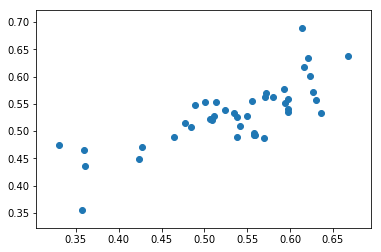

In [101]:
plt.scatter(score_adults.mean(axis=1), score_term.mean(axis=1))

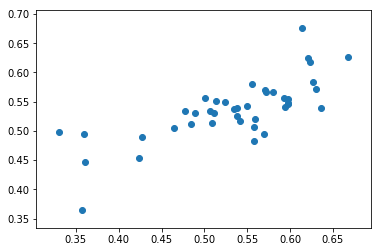

In [103]:
plt.scatter(score_adults.mean(axis=1), score_prem.mean(axis=1))

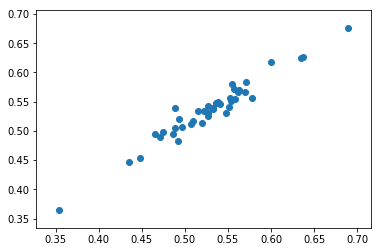

In [104]:
plt.scatter(score_term.mean(axis=1), score_prem.mean(axis=1))

In [18]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='lightgreen', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='red', lw=4)]

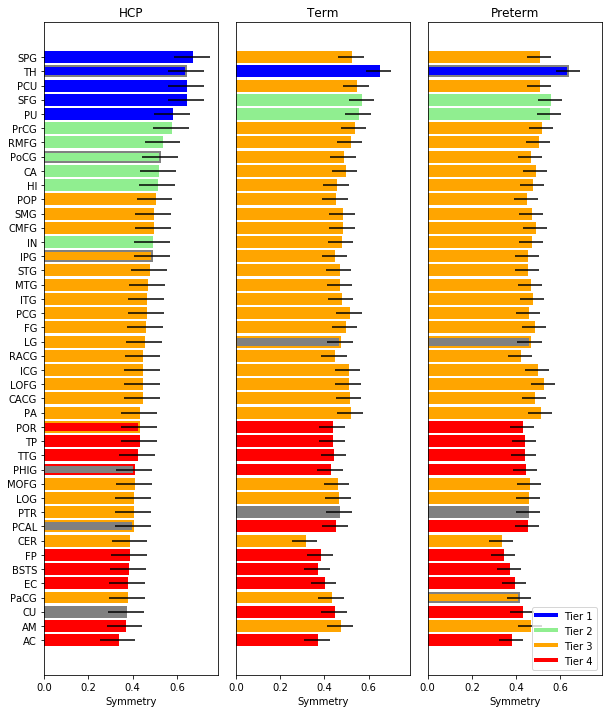

In [19]:
mycolors = np.array(['gray','blue','lightgreen','orange','red'])
# Example data
score = np.mean(score_adults,1)
order = np.argsort(score)
performance = score[order]
corder = rois_hcp[label_order_L[:42]][order].astype(int)
eorder = rois_hcp[label_order_R[:42]][order].astype(int)      
ylabels = ordered_rois[order]
y_pos = np.arange(len(ylabels))

fig, ax = plt.subplots(1,3,figsize=(10,12))
fig.subplots_adjust(wspace=0.1)
ax[0].barh(y_pos, performance, .7, xerr=np.std(score[order]), align='center',
        color=mycolors[corder], edgecolor=mycolors[eorder], ecolor='black',linewidth=2)
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels(ylabels)
ax[0].set_xlabel('Symmetry')
ax[0].set_title('HCP')


score = np.mean(score_term,1)
performance = score[order]
corder = rois_term[label_order_L[:42]][order].astype(int)
eorder = rois_term[label_order_R[:42]][order].astype(int)      
ax[1].barh(y_pos, performance, .7, xerr=np.std(score[order]), align='center',
        color=mycolors[corder], edgecolor=mycolors[eorder], ecolor='black',linewidth=2)
ax[1].set_yticks(y_pos)
ax[1].set_xlabel('Symmetry')
ax[1].set_title('Term')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_yticks([])
ax[1].set_yticklabels([])

score = np.nanmean(score_prem,1)
performance = score[order]
corder = rois_prem[label_order_L[:42]][order].astype(int)
eorder = rois_prem[label_order_R[:42]][order].astype(int)      
ax[2].barh(y_pos, performance, .7, xerr=np.std(score[order]), align='center',
        color=mycolors[corder], edgecolor=mycolors[eorder], ecolor='black',linewidth=2)
ax[2].set_yticks(y_pos)
ax[2].set_xlabel('Symmetry')
ax[2].set_title('Preterm')
ax[2].set_xlim(ax[0].get_xlim())
ax[2].set_yticks([])
ax[2].set_yticklabels([])
plt.legend(custom_lines, ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4'],loc='best')
plt.savefig('symm_natural.png',dpi=300)
plt.show()

In [392]:
score_cadults.shape

(42, 45, 100)

In [387]:
plt.barh?

In [408]:
np.where(ordered_labels_L=='L.TH')

(array([35]),)

In [409]:
np.where(ordered_labels_L=='L.AC')

(array([41]),)

In [411]:
symmetry_scores

{}

In [420]:
score_cadults[35,:].mean()

0.42266613234173717

In [422]:
score_cadults[41,:].mean()

0.05726716134653355

In [419]:
score_adults[41,:].mean()

0.33188216532374565

In [419]:
score_adults[41,:].mean()

0.33188216532374565

Connection lengths

In [144]:
neonatal_mats = sio.loadmat(path+'ST_bin_neonates.mat')['ST_bin']
neonatal_len = sio.loadmat(path+'Neonatal_matrices_LENGTH.mat')['ST_matrices']

In [4]:
hcp_mats = sio.loadmat(path+'ST_HCP94_bin.mat')['ST_bin']

In [534]:
hcp_len = sio.loadmat(path+'ST_matrices_legth_94HCP.mat')['ST_matrices']

In [149]:
index_term = np.where(ids['PRETERM(1)'] == 0)
index_prem = np.where(ids['PRETERM(1)'] == 1)

In [159]:
term_mats = np.squeeze(neonatal_mats[:,:,index_term])
prem_mats = np.squeeze(neonatal_mats[:,:,index_prem])

In [161]:
mean_term_mat = np.mean(term_mats, axis=2)
mean_prem_mat = np.mean(prem_mats, axis=2)

In [13]:
parcels = pd.read_csv(path+'labels_84.txt', sep="\s+")
parcels.set_index('index',inplace=True)

In [13]:
mean_len = np.mean(neonatal_len,axis=2)

In [34]:
mean_mat = np.mean(neonatal_mats,axis=2)

In [29]:
mean_hcp_mat = np.mean(hcp_mats,axis=2)

In [20]:
len_triu = mean_len[np.triu_indices(84,1)]

In [173]:
for el in parcels['long'][parcels['class']=='central']:
    print(el, end=', ')

Left-Thalamus, Left-Caudate, Left-Putamen, Left-Pallidum, Left-Hippocampus, Left-Amygdala, Left-Accumbens-area, Right-Thalamus, Right-Caudate, Right-Putamen, Right-Pallidum, Right-Hippocampus, Right-Amygdala, Right-Accumbens-area, 

In [23]:
parcels['tier_hcp'] = np.concatenate([[0],rois_hcp])

In [24]:
parcels['tier_term'] = np.concatenate([[0],rois_term])
parcels['tier_prem'] = np.concatenate([[0],rois_prem])

In [88]:
np.triu_indices(84,1)[0].shape

(3486,)

In [27]:
a,b = np.triu_indices(84,1)
conntype = np.zeros(len(a)).astype(str)
conntype[:] = ''
for i in range(len(a)):
    class_a = parcels['class'][a[i]+1]
    class_b = parcels['class'][b[i]+1]
    if (class_a == 'central' and class_b == 'cortex') or (class_b == 'central' and class_a == 'cortex'):
        conntype[i] = 'central-cortical'
    elif (class_a == 'cortex' and class_b == 'cortex'):
        hemi_a = 'L' if 'L' in parcels['short'][a[i]+1] else 'R'
        hemi_b = 'L' if 'L' in parcels['short'][b[i]+1] else 'R'
        if hemi_a == hemi_b:
            conntype[i] = 'cortex-intra'
        else:
            conntype[i] = 'cortex-inter'
    elif (class_a == 'cerebellum' and class_b == 'cortex') or (class_b == 'cerebellum' and class_a == 'cortex'):
        conntype[i] = 'cereb-cortical'
    elif (class_a == 'cerebellum' and class_b == 'central') or (class_b == 'cerebellum' and class_a == 'central'):
        conntype[i] = 'cereb-central'
    elif class_a == 'central' and class_b == 'central':
        conntype[i] = 'intra-central'
    elif class_a == 'cerebellum' and class_b == 'cerebellum':
        conntype[i] = 'intra-cereb'

In [135]:
a,b = np.triu_indices(84,1)
conntype = np.zeros(len(a)).astype(str)
conntype[:] = ''
for i in range(len(a)):
    class_a = parcels['class'][a[i]+1]
    class_b = parcels['class'][b[i]+1]
    if (class_a == 'central' and class_b == 'cortex') or (class_b == 'central' and class_a == 'cortex'):
        conntype[i] = 'central-cortical'
    elif (class_a == 'cortex' and class_b == 'cortex'):
        hemi_a = 'L' if 'L' in parcels['short'][a[i]+1] else 'R'
        hemi_b = 'L' if 'L' in parcels['short'][b[i]+1] else 'R'
        if hemi_a == hemi_b:
            conntype[i] = 'cortex-intra'
        else:
            conntype[i] = 'cortex-inter'
    elif (class_a == 'cerebellum' and class_b == 'cortex') or (class_b == 'cerebellum' and class_a == 'cortex'):
        conntype[i] = 'cereb-cortical'
    elif (class_a == 'cerebellum' and class_b == 'central') or (class_b == 'cerebellum' and class_a == 'central'):
        conntype[i] = 'cereb-central'
    elif class_a == 'central' and class_b == 'central':
        conntype[i] = 'intra-central'
    elif class_a == 'cerebellum' and class_b == 'cerebellum':
        conntype[i] = 'intra-cereb'

In [388]:
tier_connections_term = {1:[],2:[],3:[],4:[],0:[]}
a,b = np.triu_indices(84,1)
for i in range(len(a)):
    if mean_term_mat[a[i],b[i]] > 2/3:
        tier_connections_term[parcels['tier_term'][a[i]+1]].append(conntype[i])

In [389]:
tier_connections_prem = {1:[],2:[],3:[],0:[]}
a,b = np.triu_indices(84,1)
for i in range(len(a)):
    if mean_prem_mat[a[i],b[i]] > 2/3:
        tier_connections_prem[parcels['tier_prem'][a[i]+1]].append(conntype[i])

In [30]:
tier_connections_hcp = {1:[],2:[],3:[],0:[]}
a,b = np.triu_indices(84,1)
for i in range(len(a)):
    if mean_hcp_mat[a[i],b[i]] > 2/3:
        tier_connections_hcp[parcels['tier_hcp'][a[i]+1]].append(conntype[i])

In [413]:
len(index_term[0])

59

In [420]:
df_ctype = pd.DataFrame(columns=np.unique(conntype))

In [436]:
df_ctype.append(dict(zip(ctype, count)), ignore_index=True)

central-cortical  cereb-central  cereb-cortical  cortex-inter  \
0               7.0            NaN             2.0           1.0   

   cortex-intra  intra-central  intra-cereb  
0          20.0            NaN          NaN

In [470]:
rois_term.shape

(84,)

In [485]:
np.max(tier_term,axis=1)

array([59, 59, 55, 59, 59, 59, 59, 59, 59, 58, 59, 32, 59, 59, 58, 51, 52,
       49, 34, 57, 58, 58, 58, 59, 52, 59, 62, 58, 59, 59, 59, 46, 59, 59,
       51, 60, 58, 66, 59, 59, 59, 59, 83, 57, 71, 59, 59, 59, 58, 59, 59,
       58, 59, 59, 59, 59, 59, 59, 58, 59, 42, 59, 59, 57, 47, 52, 56, 35,
       58, 59, 58, 56, 59, 56, 59, 69, 55, 59, 59, 59, 43, 59, 59, 51],
      dtype=uint8)

In [445]:
ctype_all_terms = []
for j in range(len(index_term[0])):
    tier_ctype = {1:[],2:[],3:[],0:[]}
    a,b = np.triu_indices(84,1)
    for i in range(len(a)):
        if term_mats[a[i],b[i],j] > 0:
            tier_ctype[parcels['tier_term'][a[i]+1]].append(conntype[i])
    ctype_all_terms.append(tier_ctype)
    
term_U = pd.DataFrame(columns=np.unique(conntype))
term_A = pd.DataFrame(columns=np.unique(conntype))
term_B = pd.DataFrame(columns=np.unique(conntype))
term_C = pd.DataFrame(columns=np.unique(conntype))

term_tiers = [term_U, term_A, term_B, term_C]

for j in range(len(index_term[0])):
    for tier in ctype_all_terms[j].keys():
        ctype, count = np.unique(ctype_all_terms[j][tier],return_counts=True)
        term_tiers[tier] = term_tiers[tier].append(dict(zip(ctype, count)), ignore_index=True)
        term_tiers[tier].fillna(0,inplace=True)

In [455]:
ctype_all_prems = []
for j in range(len(index_prem[0])):
    tier_ctype = {1:[],2:[],3:[],0:[]}
    a,b = np.triu_indices(84,1)
    for i in range(len(a)):
        if prem_mats[a[i],b[i],j] > 0:
            tier_ctype[parcels['tier_prem'][a[i]+1]].append(conntype[i])
    ctype_all_prems.append(tier_ctype)
    
prem_U = pd.DataFrame(columns=np.unique(conntype))
prem_A = pd.DataFrame(columns=np.unique(conntype))
prem_B = pd.DataFrame(columns=np.unique(conntype))
prem_C = pd.DataFrame(columns=np.unique(conntype))

prem_tiers = [prem_U, prem_A, prem_B, prem_C]

for j in range(len(index_prem[0])):
    for tier in ctype_all_prems[j].keys():
        ctype, count = np.unique(ctype_all_prems[j][tier],return_counts=True)
        prem_tiers[tier] = prem_tiers[tier].append(dict(zip(ctype, count)), ignore_index=True)
        prem_tiers[tier].fillna(0,inplace=True)

In [523]:
hcp_mats.shape

(84, 84, 94)

In [31]:
ctype_all_hcp = []
for j in range(hcp_mats.shape[2]):
    tier_ctype = {1:[],2:[],3:[],0:[]}
    a,b = np.triu_indices(84,1)
    for i in range(len(a)):
        if hcp_mats[a[i],b[i],j] > 0:
            tier_ctype[parcels['tier_hcp'][a[i]+1]].append(conntype[i])
    ctype_all_hcp.append(tier_ctype)
    
hcp_U = pd.DataFrame(columns=np.unique(conntype))
hcp_A = pd.DataFrame(columns=np.unique(conntype))
hcp_B = pd.DataFrame(columns=np.unique(conntype))
hcp_C = pd.DataFrame(columns=np.unique(conntype))

hcp_tiers = [hcp_U, hcp_A, hcp_B, hcp_C]

for j in range(hcp_mats.shape[2]):
    for tier in ctype_all_hcp[j].keys():
        ctype, count = np.unique(ctype_all_hcp[j][tier],return_counts=True)
        hcp_tiers[tier] = hcp_tiers[tier].append(dict(zip(ctype, count)), ignore_index=True)
        hcp_tiers[tier].fillna(0,inplace=True)

In [463]:
index= 0
for i in range(4):
    print('Tier',i)
    tterm = term_tiers[i]
    tprem = prem_tiers[i]
    for i in range(len(tterm.columns)):
        try:
            s, p = mannwhitneyu(tterm[tterm.columns[i]],tprem[tprem.columns[i]],alternative='two-sided')
        except Exception as e:
            p = 1
        print(tterm.columns[i],p,sep=',')

    index = index + 1

Tier 0
central-cortical,0.5852054620296216
cereb-central,1
cereb-cortical,0.6685285928778046
cortex-inter,0.8673267520595288
cortex-intra,1.1112036455997427e-23
intra-central,1
intra-cereb,1
Tier 1
central-cortical,0.016502189816608084
cereb-central,0.389507205486057
cereb-cortical,0.6678742166290078
cortex-inter,0.008230803407265539
cortex-intra,0.19320126265355098
intra-central,0.1526469632832094
intra-cereb,1
Tier 2
central-cortical,0.6988196643074762
cereb-central,0.030791293103718465
cereb-cortical,0.010506756671081929
cortex-inter,0.0019324927061585865
cortex-intra,0.6635715945114495
intra-central,0.09360787569016378
intra-cereb,1
Tier 3
central-cortical,0.02806679376409139
cereb-central,0.2755666728361086
cereb-cortical,0.012741243330075508
cortex-inter,0.3403757050308608
cortex-intra,0.0008523137874755927
intra-central,0.015107029405246225
intra-cereb,1


In [529]:
index= 0
for i in range(4):
    print('Tier',i)
    tterm = term_tiers[i]
    thcp = hcp_tiers[i]
    for i in range(len(tterm.columns)):
        try:
            s, p = mannwhitneyu(tterm[tterm.columns[i]],thcp[thcp.columns[i]],alternative='two-sided')
        except Exception as e:
            p = 1
        print(tterm.columns[i],p,sep=',')

    index = index + 1

Tier 0
central-cortical,1.5726454501514787e-25
cereb-central,6.51335863055863e-35
cereb-cortical,9.541457936815794e-10
cortex-inter,1.4335228870049393e-13
cortex-intra,2.5861448123652386e-10
intra-central,4.3854348056626794e-29
intra-cereb,1
Tier 1
central-cortical,2.3896701369358547e-25
cereb-central,1.7972515435486043e-29
cereb-cortical,6.043973523869719e-07
cortex-inter,1.9890106720790977e-25
cortex-intra,1.7074788863969121e-25
intra-central,2.8490866255051363e-23
intra-cereb,6.51335863055863e-35
Tier 2
central-cortical,2.5313756194514152e-25
cereb-central,4.198047036816779e-26
cereb-cortical,3.1028241695420422e-09
cortex-inter,9.799281132031676e-24
cortex-intra,6.084192891357643e-11
intra-central,1.964919932460603e-25
intra-cereb,6.51335863055863e-35
Tier 3
central-cortical,2.199322149840121e-25
cereb-central,0.0017929353204781816
cereb-cortical,1.6831335514973104e-07
cortex-inter,3.047235224089628e-21
cortex-intra,2.3389294109967047e-25
intra-central,7.727288170761982e-25
intra-ce

In [32]:
print('HCP')
for key in tier_connections_hcp.keys():
    print('Tier',key) 
    ctype, count = np.unique(tier_connections_hcp[key],return_counts=True)
    for i in range(len(ctype)):
        print(ctype[i],count[i], sep=',')

HCP
Tier 1
central-cortical,95
cereb-central,4
cereb-cortical,5
cortex-inter,45
cortex-intra,34
intra-central,24
Tier 2
central-cortical,165
cereb-central,14
cereb-cortical,7
cortex-inter,129
cortex-intra,341
intra-central,10
intra-cereb,1
Tier 3
central-cortical,18
cortex-inter,3
cortex-intra,22
Tier 0
central-cortical,4
cortex-inter,5
cortex-intra,11


In [391]:
print('PRETERM')
for key in tier_connections_prem.keys():
    print('Tier',key) 
    ctype, count = np.unique(tier_connections_prem[key],return_counts=True)
    for i in range(len(ctype)):
        print(ctype[i],count[i], sep=',')

PRETERM
Tier 1
central-cortical,73
cereb-central,4
cereb-cortical,1
cortex-inter,8
cortex-intra,11
intra-central,31
Tier 2
central-cortical,176
cereb-central,16
cereb-cortical,14
cortex-inter,87
cortex-intra,368
intra-central,23
intra-cereb,1
Tier 3
central-cortical,20
cereb-cortical,2
cortex-inter,8
cortex-intra,68
Tier 0
central-cortical,5
cereb-cortical,2
cortex-intra,30


In [392]:
print('TERM')
for key in tier_connections_term.keys():
    print('Tier',key) 
    ctype, count = np.unique(tier_connections_term[key],return_counts=True)
    for i in range(len(ctype)):
        print(ctype[i],':',count[i])

TERM
Tier 1
central-cortical : 72
cereb-central : 4
cereb-cortical : 1
cortex-inter : 9
cortex-intra : 11
intra-central : 32
Tier 2
central-cortical : 179
cereb-central : 15
cereb-cortical : 13
cortex-inter : 97
cortex-intra : 368
intra-central : 27
intra-cereb : 1
Tier 3
central-cortical : 22
cortex-inter : 8
cortex-intra : 71
Tier 4
Tier 0
central-cortical : 6
cereb-cortical : 2
cortex-intra : 18


In [174]:
from scipy.stats import chi2_contingency

In [401]:
chi2_contingency([[179,15,13,97,368,27,1],[176,16,14,87,368,23,1]])

(0.795763941330225,
 0.9921867678986375,
 6,
 array([[179.42238267,  15.66787004,  13.64620939,  92.99638989,
         371.98555957,  25.27075812,   1.01083032],
        [175.57761733,  15.33212996,  13.35379061,  91.00361011,
         364.01444043,  24.72924188,   0.98916968]]))

In [402]:
chi2_contingency([[161,329,125,10,7,14,1],[179,368,97,27,13,15,1]])

(14.248660080806703,
 0.026978530967744555,
 6,
 array([[163.31106162, 334.78767632, 106.6325167 ,  17.77208612,
           9.60653304,  13.9294729 ,   0.9606533 ],
        [176.68893838, 362.21232368, 115.3674833 ,  19.22791388,
          10.39346696,  15.0705271 ,   1.0393467 ]]))

Connection length

(array([  1.,   1.,   4.,   5.,   6.,   5.,  28.,  77.,  80., 118., 103.,
         76.,  88.,  99., 128., 104., 103.,  73.,  95., 102., 122., 123.,
        119., 117., 131., 117., 144., 135., 154., 142., 108., 103.,  97.,
         72.,  89.,  69.,  70.,  62.,  57.,  47.,  44.,  28.,  21.,   8.,
          4.,   1.,   3.,   2.,   0.,   1.]),
 array([  8.83914274,  11.60710635,  14.37506996,  17.14303357,
         19.91099718,  22.67896079,  25.4469244 ,  28.21488801,
         30.98285162,  33.75081523,  36.51877884,  39.28674244,
         42.05470605,  44.82266966,  47.59063327,  50.35859688,
         53.12656049,  55.8945241 ,  58.66248771,  61.43045132,
         64.19841493,  66.96637854,  69.73434215,  72.50230576,
         75.27026937,  78.03823297,  80.80619658,  83.57416019,
         86.3421238 ,  89.11008741,  91.87805102,  94.64601463,
         97.41397824, 100.18194185, 102.94990546, 105.71786907,
        108.48583268, 111.25379629, 114.02175989, 116.7897235 ,
        119.557687

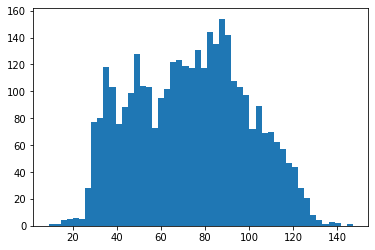

In [23]:
plt.hist(len_triu, bins=50)

In [179]:
term_len_mats = np.squeeze(neonatal_len[:,:,index_term])
prem_len_mats = np.squeeze(neonatal_len[:,:,index_prem])

In [180]:
mean_len_term = np.mean(term_len_mats,axis=2)
mean_len_prem = np.mean(prem_len_mats,axis=2)

In [183]:
pearsonr(mean_prem_mat.reshape(-1), mean_term_mat.reshape(-1))

(0.986834819385679, 0.0)

In [184]:
pearsonr(mean_len_term.reshape(-1), mean_len_prem.reshape(-1))

(0.9781813637627501, 0.0)

In [188]:
rois_term == 1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False])

In [314]:
np.max?

In [327]:
term_len_mats = term_len_mats/np.max(term_len_mats,axis=(0,1))

In [328]:
prem_len_mats = prem_len_mats/np.max(prem_len_mats,axis=(0,1))

In [556]:
hcp_len = hcp_len/np.max(hcp_len,axis=(0,1))

In [320]:
np.max(term_len_mats.reshape(-1,59),axis=0).shape

(59,)

In [344]:
group_len = {}
for tier in [1,2,3]:
    tier_rois = np.where(rois_term==tier)
    connmats = term_len_mats[rois_term==tier,:,:]
    all_lengths = list()
    all_lengths.append(connmats[0,:,:].reshape(-1))
    for i in range(1,connmats.shape[0]):
        all_lengths.append(connmats[i,np.setdiff1d(tier_rois,np.arange(i))].reshape(-1))
    group_len[tier] = np.concatenate(all_lengths)
        

In [501]:
len_all_terms = np.zeros([4,len(index_term[0])])

for tier in [0,1,2,3]:
    tier_rois = np.where(rois_term==tier)
    connmats = term_len_mats[rois_term==tier,:,:]
    len_all_terms[tier,:] = np.mean(connmats,axis=(0,1))       

In [505]:
len_all_prems = np.zeros([4,len(index_prem[0])])

for tier in [0,1,2,3]:
    tier_rois = np.where(rois_prem==tier)
    connmats = prem_len_mats[rois_prem==tier,:,:]
    len_all_prems[tier,:] = np.mean(connmats,axis=(0,1))       

In [510]:
mannwhitneyu(len_all_terms[0],len_all_prems[0],alternative='two-sided'), np.mean(len_all_terms[0]), np.mean(len_all_prems[0])

(MannwhitneyuResult(statistic=3248.0, pvalue=1.82269660906059e-05),
 0.4109746374349437,
 0.391559455149089)

In [512]:
mannwhitneyu(len_all_terms[1],len_all_prems[1],alternative='two-sided'), np.mean(len_all_terms[1]), np.mean(len_all_prems[1])

(MannwhitneyuResult(statistic=3068.0, pvalue=0.00047370654719270744),
 0.36499169130932285,
 0.35422032506349693)

In [513]:
mannwhitneyu(len_all_terms[2],len_all_prems[2],alternative='two-sided'), np.mean(len_all_terms[2]), np.mean(len_all_prems[2])

(MannwhitneyuResult(statistic=3265.0, pvalue=1.2993283673778048e-05),
 0.401655518913121,
 0.38518895632936373)

In [514]:
mannwhitneyu(len_all_terms[3],len_all_prems[3],alternative='two-sided'), np.mean(len_all_terms[3]), np.mean(len_all_prems[3])

(MannwhitneyuResult(statistic=3483.0, pvalue=1.0523371730754655e-07),
 0.38025065471208513,
 0.35218213933301123)

(array([134., 413., 366., 512., 394., 462., 206., 200., 255., 345., 443.,
        471., 381., 300., 216., 192., 219., 193., 201., 168., 115.,  56.,
         36.,  35.,  22.,  15.,   1.,   4.,   0.,   2.]),
 array([0.15253711, 0.17832021, 0.20410332, 0.22988643, 0.25566954,
        0.28145264, 0.30723575, 0.33301886, 0.35880197, 0.38458508,
        0.41036818, 0.43615129, 0.4619344 , 0.48771751, 0.51350061,
        0.53928372, 0.56506683, 0.59084994, 0.61663304, 0.64241615,
        0.66819926, 0.69398237, 0.71976547, 0.74554858, 0.77133169,
        0.7971148 , 0.8228979 , 0.84868101, 0.87446412, 0.90024723,
        0.92603034]),
 <a list of 30 Patch objects>)

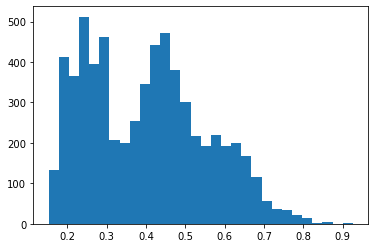

In [345]:
plt.hist(group_len[1][np.where(group_len[1])], bins=30)

(array([1.595e+03, 6.390e+03, 7.945e+03, 8.077e+03, 7.823e+03, 7.022e+03,
        7.589e+03, 8.818e+03, 8.027e+03, 7.398e+03, 7.428e+03, 7.623e+03,
        7.037e+03, 5.892e+03, 5.048e+03, 4.569e+03, 4.028e+03, 2.976e+03,
        2.099e+03, 1.287e+03, 7.290e+02, 3.980e+02, 2.430e+02, 1.250e+02,
        5.700e+01, 5.000e+01, 2.400e+01, 1.300e+01, 5.000e+00, 4.000e+00]),
 array([0.12793294, 0.15700184, 0.18607074, 0.21513965, 0.24420855,
        0.27327745, 0.30234635, 0.33141525, 0.36048416, 0.38955306,
        0.41862196, 0.44769086, 0.47675976, 0.50582867, 0.53489757,
        0.56396647, 0.59303537, 0.62210427, 0.65117318, 0.68024208,
        0.70931098, 0.73837988, 0.76744878, 0.79651769, 0.82558659,
        0.85465549, 0.88372439, 0.91279329, 0.9418622 , 0.9709311 ,
        1.        ]),
 <a list of 30 Patch objects>)

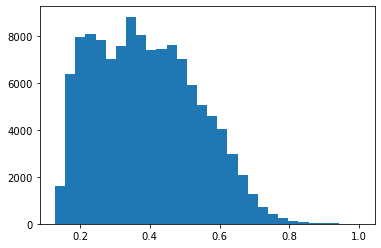

In [346]:
plt.hist(group_len[2][np.where(group_len[2])], bins=30)

(array([ 319.,  573.,  529.,  626., 1184., 1145., 1326., 1363., 1131.,
         993., 1330., 1178., 1133., 1054.,  836.,  808.,  697.,  513.,
         436.,  317.,  236.,  176.,  113.,   93.,   64.,   45.,   47.,
          36.,   19.,   36.]),
 array([0.10471808, 0.13456081, 0.16440354, 0.19424627, 0.224089  ,
        0.25393173, 0.28377446, 0.31361719, 0.34345992, 0.37330265,
        0.40314538, 0.43298811, 0.46283085, 0.49267358, 0.52251631,
        0.55235904, 0.58220177, 0.6120445 , 0.64188723, 0.67172996,
        0.70157269, 0.73141542, 0.76125815, 0.79110088, 0.82094362,
        0.85078635, 0.88062908, 0.91047181, 0.94031454, 0.97015727,
        1.        ]),
 <a list of 30 Patch objects>)

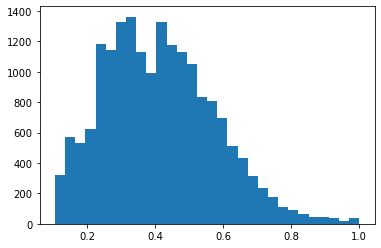

In [347]:
plt.hist(group_len[3][np.where(group_len[3])], bins=30)

In [349]:
group_len_prem = {}
for tier in [1,2,3]:
    tier_rois = np.where(rois_prem==tier)
    connmats = prem_len_mats[rois_prem==tier,:,:]
    all_lengths = list()
    all_lengths.append(connmats[0,:,:].reshape(-1))
    for i in range(1,connmats.shape[0]):
        all_lengths.append(connmats[i,np.setdiff1d(tier_rois,np.arange(i))].reshape(-1))
    group_len_prem[tier] = np.concatenate(all_lengths)
        

In [558]:
group_len_hcp = {}
for tier in [1,2,3]:
    tier_rois = np.where(rois_hcp==tier)
    connmats = hcp_len[rois_hcp==tier,:,:]
    all_lengths = list()
    all_lengths.append(connmats[0,:,:].reshape(-1))
    for i in range(1,connmats.shape[0]):
        all_lengths.append(connmats[i,np.setdiff1d(tier_rois,np.arange(i))].reshape(-1))
    group_len_hcp[tier] = np.concatenate(all_lengths)
        

In [560]:
plt.hist?

In [563]:
np.min(group_len_hcp[3][np.where(group_len_hcp[3])])

0.08968567652354503

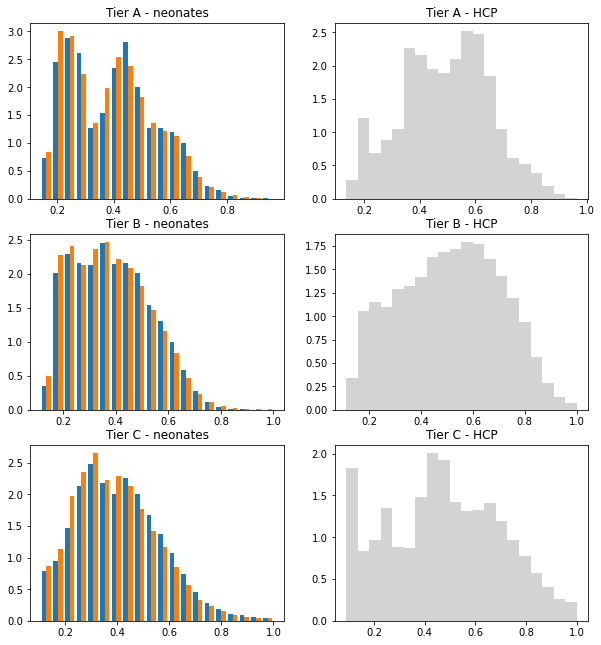

In [562]:
plt.figure(figsize=(10,11))
plt.subplot(3,2,1)
plt.hist((group_len[1][np.where(group_len[1])],group_len_prem[1][np.where(group_len_prem[1])]),bins=20, density=True)
plt.title('Tier A - neonates')
plt.subplot(3,2,2)
plt.hist(group_len_hcp[1][np.where(group_len_hcp[1])],bins=20, density=True, color='lightgray')
plt.title('Tier A - HCP')
plt.subplot(323)
plt.hist((group_len[2][np.where(group_len[2])],group_len_prem[2][np.where(group_len_prem[2])]),bins=20, density=True)
plt.title('Tier B - neonates')
plt.subplot(324)
plt.hist(group_len_hcp[2][np.where(group_len_hcp[2])],bins=20, density=True, color='lightgray')
plt.title('Tier B - HCP')
plt.subplot(325)
plt.hist((group_len[3][np.where(group_len[3])],group_len_prem[3][np.where(group_len_prem[3])]),bins=20, density=True)
plt.title('Tier C - neonates')
plt.subplot(326)
plt.hist(group_len_hcp[3][np.where(group_len_hcp[3])],bins=20, density=True, color='lightgray')
plt.title('Tier C - HCP')
plt.show()

In [355]:
mannwhitneyu(group_len[1][np.where(group_len[1])],group_len_prem[1][np.where(group_len_prem[1])], alternative='greater'),ranksums(group_len[1][np.where(group_len[1])],group_len_prem[1][np.where(group_len_prem[1])]), ttest_ind(group_len[1][np.where(group_len[1])],group_len_prem[1][np.where(group_len_prem[1])], equal_var=False), np.mean(group_len[1][np.where(group_len[1])]), np.mean(group_len_prem[1][np.where(group_len_prem[1])])

(MannwhitneyuResult(statistic=27548614.0, pvalue=5.589556405082823e-07),
 RanksumsResult(statistic=4.869660736098887, pvalue=1.1179001707924433e-06),
 Ttest_indResult(statistic=4.528716172835008, pvalue=5.9847203516158364e-06),
 0.4011472980121898,
 0.3897855682264852)

In [356]:
mannwhitneyu(group_len[2][np.where(group_len[2])],group_len_prem[2][np.where(group_len_prem[2])], alternative='greater'),ranksums(group_len[2][np.where(group_len[2])],group_len_prem[2][np.where(group_len_prem[2])]), ttest_ind(group_len[2][np.where(group_len[2])],group_len_prem[2][np.where(group_len_prem[2])], equal_var=False), np.mean(group_len[2][np.where(group_len[2])]), np.mean(group_len_prem[2][np.where(group_len_prem[2])])

(MannwhitneyuResult(statistic=9516340100.0, pvalue=2.0006877590819315e-101),
 RanksumsResult(statistic=21.34879331412889, pvalue=4.001373425454839e-101),
 Ttest_indResult(statistic=20.823498503364057, pvalue=3.1843361048909483e-96),
 0.38934613186737416,
 0.3776506816713361)

In [357]:
mannwhitneyu(group_len[3][np.where(group_len[3])],group_len_prem[3][np.where(group_len_prem[3])], alternative='greater'),ranksums(group_len[3][np.where(group_len[3])],group_len_prem[3][np.where(group_len_prem[3])]), ttest_ind(group_len[3][np.where(group_len[3])],group_len_prem[3][np.where(group_len_prem[3])], equal_var=False), np.mean(group_len[3][np.where(group_len[3])]), np.mean(group_len_prem[3][np.where(group_len_prem[3])])

(MannwhitneyuResult(statistic=224107729.5, pvalue=1.0805038946567629e-46),
 RanksumsResult(statistic=14.30086729087605, pvalue=2.1609952084521223e-46),
 Ttest_indResult(statistic=13.963975266576432, pvalue=3.3102051223897473e-44),
 0.4124022590910535,
 0.3901157780264737)

Comparing tiers

all

In [363]:
all_group_len[1].shape

(14636,)

In [362]:
all_group_len = {}
for tier in [1,2,3]:
    all_group_len[tier] = np.concatenate((group_len[tier][np.where(group_len[tier])],group_len_prem[tier][np.where(group_len_prem[tier])]))

In [370]:
mannwhitneyu(all_group_len[1],all_group_len[2],alternative='two-sided'), ranksums(all_group_len[1],all_group_len[2]), ttest_ind(all_group_len[1],all_group_len[2], equal_var=False), np.mean(all_group_len[1]), np.mean(all_group_len[2])

(MannwhitneyuResult(statistic=2068357463.0, pvalue=1.5698181283194945e-17),
 RanksumsResult(statistic=8.521881662041023, pvalue=1.5698174325425738e-17),
 Ttest_indResult(statistic=9.328884060723206, pvalue=1.2057546083070422e-20),
 0.3947204217552993,
 0.3828372744948643)

In [369]:
mannwhitneyu(all_group_len[1],all_group_len[3],alternative='two-sided'), ranksums(all_group_len[1],all_group_len[3]), ttest_ind(all_group_len[1],all_group_len[3], equal_var=False), np.mean(all_group_len[1]), np.mean(all_group_len[3])

(MannwhitneyuResult(statistic=294749675.0, pvalue=0.004612184768088119),
 RanksumsResult(statistic=-2.8329416472176963, pvalue=0.004612180455236702),
 Ttest_indResult(statistic=-3.6571322301476155, pvalue=0.0002555308515145064),
 0.3947204217552993,
 0.400112617047573)

In [368]:
mannwhitneyu(all_group_len[2],all_group_len[3],alternative='two-sided'), ranksums(all_group_len[2],all_group_len[3]), ttest_ind(all_group_len[2],all_group_len[3], equal_var=False), np.mean(all_group_len[2]), np.mean(all_group_len[3])

(MannwhitneyuResult(statistic=5260814911.0, pvalue=1.7138232739735891e-65),
 RanksumsResult(statistic=-17.09160797016654, pvalue=1.7138224147565849e-65),
 Ttest_indResult(statistic=-20.5433323101832, pvalue=2.092773128939204e-93),
 0.3828372744948643,
 0.400112617047573)

term

In [382]:
mannwhitneyu(group_len[1][np.where(group_len[1])],group_len[3][np.where(group_len[3])], alternative='less'),ranksums(group_len[1][np.where(group_len[1])],group_len[3][np.where(group_len[3])]), ttest_ind(group_len[1][np.where(group_len[1])],group_len[3][np.where(group_len[3])], equal_var=False), np.mean(group_len[1][np.where(group_len[1])]), np.mean(group_len[3][np.where(group_len[3])])

(MannwhitneyuResult(statistic=56168633.5, pvalue=4.527448083543134e-06),
 RanksumsResult(statistic=-4.438593764580474, pvalue=9.054853632913333e-06),
 Ttest_indResult(statistic=-5.018048159059455, pvalue=5.295794550368811e-07),
 0.4011472980121898,
 0.4124022590910535)

In [383]:
mannwhitneyu(group_len[1][np.where(group_len[1])],group_len[2][np.where(group_len[2])], alternative='greater'),ranksums(group_len[1][np.where(group_len[1])],group_len[2][np.where(group_len[2])]), ttest_ind(group_len[1][np.where(group_len[1])],group_len[2][np.where(group_len[2])], equal_var=False), np.mean(group_len[1][np.where(group_len[1])]), np.mean(group_len[2][np.where(group_len[2])])

(MannwhitneyuResult(statistic=397861234.5, pvalue=2.8298854791972362e-08),
 RanksumsResult(statistic=5.429230165567802, pvalue=5.6597653868679324e-08),
 Ttest_indResult(statistic=6.08149794360638, pvalue=1.253350190024188e-09),
 0.4011472980121898,
 0.38934613186737416)

In [384]:
mannwhitneyu(group_len[3][np.where(group_len[3])],group_len[2][np.where(group_len[2])], alternative='greater'),ranksums(group_len[3][np.where(group_len[3])],group_len[2][np.where(group_len[2])]), ttest_ind(group_len[3][np.where(group_len[3])],group_len[2][np.where(group_len[2])], equal_var=False), np.mean(group_len[3][np.where(group_len[3])]), np.mean(group_len[2][np.where(group_len[2])])

(MannwhitneyuResult(statistic=1184794454.5, pvalue=1.7965567074711413e-57),
 RanksumsResult(statistic=15.935500756146043, pvalue=3.5931077680537857e-57),
 Ttest_indResult(statistic=18.126939634191487, pvalue=6.269191766482254e-73),
 0.4124022590910535,
 0.38934613186737416)

preterm

In [378]:
mannwhitneyu(group_len_prem[1][np.where(group_len_prem[1])],group_len_prem[3][np.where(group_len_prem[3])], alternative='less'),ranksums(group_len_prem[1][np.where(group_len_prem[1])],group_len_prem[3][np.where(group_len_prem[3])]), ttest_ind(group_len_prem[1][np.where(group_len_prem[1])],group_len_prem[3][np.where(group_len_prem[3])], equal_var=False), np.mean(group_len_prem[1][np.where(group_len_prem[1])]), np.mean(group_len_prem[3][np.where(group_len_prem[3])])

(MannwhitneyuResult(statistic=93670152.5, pvalue=0.6452710454135624),
 RanksumsResult(statistic=0.3725835115259997, pvalue=0.7094584465282798),
 Ttest_indResult(statistic=-0.16915382993263478, pvalue=0.8656778548746057),
 0.3897855682264852,
 0.3901157780264737)

In [379]:
mannwhitneyu(group_len_prem[1][np.where(group_len_prem[1])],group_len_prem[2][np.where(group_len_prem[2])], alternative='greater'),ranksums(group_len_prem[1][np.where(group_len_prem[1])],group_len_prem[2][np.where(group_len_prem[2])]), ttest_ind(group_len_prem[1][np.where(group_len_prem[1])],group_len_prem[2][np.where(group_len_prem[2])], equal_var=False), np.mean(group_len_prem[1][np.where(group_len_prem[1])]), np.mean(group_len_prem[2][np.where(group_len_prem[2])])

(MannwhitneyuResult(statistic=652429125.5, pvalue=8.77118588440528e-12),
 RanksumsResult(statistic=6.725140101515628, pvalue=1.7542357004346157e-11),
 Ttest_indResult(statistic=7.195578919824833, pvalue=6.70920916050629e-13),
 0.3897855682264852,
 0.3776506816713361)

In [381]:
mannwhitneyu(group_len_prem[3][np.where(group_len_prem[3])],group_len_prem[2][np.where(group_len_prem[2])], alternative='greater'),ranksums(group_len_prem[3][np.where(group_len_prem[3])],group_len_prem[2][np.where(group_len_prem[2])]), ttest_ind(group_len_prem[3][np.where(group_len_prem[3])],group_len_prem[2][np.where(group_len_prem[2])], equal_var=False), np.mean(group_len_prem[3][np.where(group_len_prem[3])]), np.mean(group_len_prem[2][np.where(group_len_prem[2])])

(MannwhitneyuResult(statistic=1764049089.0, pvalue=3.8751351883216125e-18),
 RanksumsResult(statistic=8.603231165314169, pvalue=7.750265581671748e-18),
 Ttest_indResult(statistic=11.172106753546695, pvalue=6.412225060196504e-29),
 0.3901157780264737,
 0.3776506816713361)

Comparing network metrics

In [257]:
T = sio.loadmat('T')['T']
Eloc = sio.loadmat('Eloc')['Eloc_mean']
Eglob = sio.loadmat('Eglob')['Eglob']
CPL = sio.loadmat('CPL')['L']
CC = sio.loadmat('CC')['C_mean']

In [282]:
ranksums(T[index_term], T[index_prem]), ttest_ind(T[index_term], T[index_prem], equal_var=False), np.mean(T[index_term]), np.mean(T[index_prem])

(RanksumsResult(statistic=-4.568788516634473, pvalue=4.905514489430833e-06),
 Ttest_indResult(statistic=array([-4.84648361]), pvalue=array([3.42905059e-06])),
 0.5846075057769746,
 0.593232971499556)

In [284]:
ranksums(Eloc[index_term], Eloc[index_prem]), ttest_ind(Eloc[index_term], Eloc[index_prem], equal_var=False), np.mean(Eloc[index_term]), np.mean(Eloc[index_prem])

(RanksumsResult(statistic=-1.2843542922783115, pvalue=0.19901801816949294),
 Ttest_indResult(statistic=array([-0.56688327]), pvalue=array([0.57176215])),
 0.8436566186565561,
 0.8442560304266037)

In [285]:
ranksums(Eglob[index_term], Eglob[index_prem]), ttest_ind(Eglob[index_term], Eglob[index_prem], equal_var=False), np.mean(Eglob[index_term]), np.mean(Eglob[index_prem])

(RanksumsResult(statistic=3.703770412091473, pvalue=0.0002124185207045319),
 Ttest_indResult(statistic=array([4.11286764]), pvalue=array([7.02348334e-05])),
 0.6285393389538815,
 0.62554640330028)

In [286]:
ranksums(CPL[index_term], CPL[index_prem]), ttest_ind(CPL[index_term], CPL[index_prem], equal_var=False), np.mean(CPL[index_term]), np.mean(CPL[index_prem])

(RanksumsResult(statistic=-3.084645778890646, pvalue=0.0020379470951426),
 Ttest_indResult(statistic=array([-3.3025615]), pvalue=array([0.00125397])),
 1.8267562661915597,
 1.8367340982050697)

In [287]:
ranksums(CC[index_term], CC[index_prem]), ttest_ind(CC[index_term], CC[index_prem], equal_var=False), np.mean(CC[index_term]), np.mean(CC[index_prem])

(RanksumsResult(statistic=-1.6444125896007784, pvalue=0.10009100634215189),
 Ttest_indResult(statistic=array([-1.75798752]), pvalue=array([0.08103537])),
 0.6893489714785462,
 0.6922971318099383)

In [271]:
?ttest_ind

(array([[ 0.,  0.,  0.,  0.,  1.,  0., 10., 17., 22.,  9.],
        [ 2.,  2.,  1.,  0.,  3.,  6., 17., 30., 13.,  3.]]),
 array([0.60508701, 0.60802974, 0.61097246, 0.61391518, 0.61685791,
        0.61980063, 0.62274335, 0.62568608, 0.6286288 , 0.63157152,
        0.63451425]),
 <a list of 2 Lists of Patches objects>)

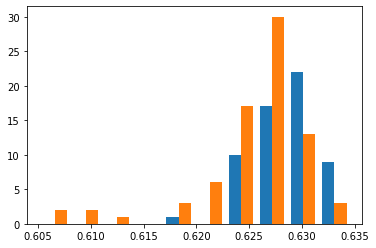

In [293]:
plt.hist((Eglob[index_term],Eglob[index_prem]))

Extracting tiers from connectomes

In [5]:
hcp_mats = sio.loadmat(path+'ST_HCP94_bin.mat')['ST_bin']

In [14]:
hcp_mats.shape

(84, 84, 94)

In [ ]:
node_degrees = np.array([hcp_mats[:,:,i].sum(axis=1) for i in range(hcp_mats.shape[2])])

(array([  6.,  58., 176., 347., 408., 364., 323., 393., 442., 610., 572.,
        602., 530., 486., 412., 335., 244., 226., 209., 141.,  96., 101.,
        133., 155., 183., 181., 111.,  40.,   9.,   3.]),
 array([ 1.        ,  2.96666667,  4.93333333,  6.9       ,  8.86666667,
        10.83333333, 12.8       , 14.76666667, 16.73333333, 18.7       ,
        20.66666667, 22.63333333, 24.6       , 26.56666667, 28.53333333,
        30.5       , 32.46666667, 34.43333333, 36.4       , 38.36666667,
        40.33333333, 42.3       , 44.26666667, 46.23333333, 48.2       ,
        50.16666667, 52.13333333, 54.1       , 56.06666667, 58.03333333,
        60.        ]),
 <a list of 30 Patch objects>)

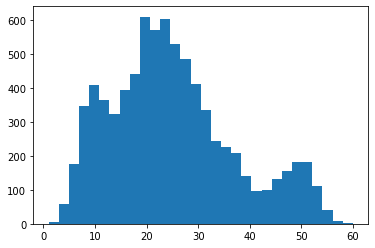

In [32]:
plt.hist(node_degrees.reshape(-1), bins=30)

For adults, Tier 1 was defined from the maximum degree to a degree of 44, Tier 2 from 43 down to 31, Tier 3 from 30 down to 14 and Tier 1 from 13 down to 1.

In [37]:
node_degrees<14

array([[ True, False, False, ...,  True, False, False],
       [ True, False, False, ...,  True, False, False],
       [ True, False, False, ...,  True, False, False],
       ...,
       [ True, False, False, ...,  True, False, False],
       [ True, False, False, ...,  True, False, False],
       [ True, False, False, ...,  True, False, False]])

In [38]:
node_degrees[node_degrees<14] = 3
node_degrees[np.logical_and(node_degrees>13,node_degrees< 44)] = 2
node_degrees[node_degrees>43] = 1

In [58]:
np.unique(node_degrees)

array([1, 2, 3], dtype=uint32)

In [67]:
mytiers = np.zeros((84,3))

In [65]:
uniq.shape

(2,)

In [70]:
for i in range(84):
    uniq, cnt = np.unique(node_degrees[:,i], return_counts=True)
    mytiers[i,uniq-1] = cnt 

In [73]:
myrois_hcp = np.zeros([84,])
[r,c] = np.where(mytiers>=94/3*2)
myrois_hcp[r] = c+1

In [36]:
np.savetxt('rois_hcp_94.txt',rois_hcp,fmt='%d')

In [71]:
mytiers

array([[ 0.,  5., 89.],
       [ 0., 89.,  5.],
       [ 0., 94.,  0.],
       [ 0., 74., 20.],
       [ 0.,  0., 94.],
       [ 0., 94.,  0.],
       [ 0., 94.,  0.],
       [ 0., 94.,  0.],
       [ 0., 94.,  0.],
       [ 0., 94.,  0.],
       [ 0., 94.,  0.],
       [ 0., 94.,  0.],
       [ 0., 94.,  0.],
       [ 0., 94.,  0.],
       [ 0., 51., 43.],
       [ 0., 94.,  0.],
       [ 0., 94.,  0.],
       [ 0., 44., 50.],
       [ 0., 90.,  4.],
       [ 0., 68., 26.],
       [ 0., 94.,  0.],
       [ 0., 94.,  0.],
       [ 1., 93.,  0.],
       [80., 14.,  0.],
       [ 0., 94.,  0.],
       [ 1., 93.,  0.],
       [94.,  0.,  0.],
       [92.,  2.,  0.],
       [ 0., 94.,  0.],
       [ 0., 94.,  0.],
       [ 0., 14., 80.],
       [ 0.,  2., 92.],
       [ 0.,  1., 93.],
       [ 4., 90.,  0.],
       [ 0., 90.,  4.],
       [93.,  1.,  0.],
       [ 0., 94.,  0.],
       [75., 19.,  0.],
       [ 0., 94.,  0.],
       [ 0., 94.,  0.],
       [ 0., 17., 77.],
       [ 0.,  2.